# <center><font size = '10' color = 'crimson'>Solar Radiation Estimation: Benin<font/><center/>


## **Overview**

## <font color = 'green'>Business Objective<font/>



MoonLight Energy Solutions aims to develop a strategic approach to significantly enhance its operational efficiency and sustainability through targeted solar investments. As an Analytics Engineer at MoonLight Energy Solutions, your task is to perform a quick analysis of an environmental measurement provided by the engineering team and translate your observation as a strategy report. Your analysis should focus on identifying key trends and learn valuable insights that will support your data-driven case - your recommendation based on the statistical analysis and EDA.  In particular, your analysis and recommendation must present a strategy focusing on identifying high-potential regions for solar installation that align with the company's long-term sustainability goals. Your report should provide an insight to help realize the overarching objectives of MoonLight Energy Solutions.

## <font color = 'green'>Dataset Overview<font/>



### Solar Radiation Measurement Data

The data for this week's challenge is extracted and aggregated from Solar Radiation Measurement Data. Each row in the data contains the values for solar radiation, air temperature, relative humidity, barometric pressure, precipitation, wind speed, and wind direction, cleaned and soiled radiance sensor (soiling measurement) and cleaning events.

The structure of the data is as follows:

- **Timestamp (yyyy-mm-dd hh:mm)**: Date and time of each observation.
- **GHI (W/m²)**: Global Horizontal Irradiance, the total solar radiation received per square meter on a horizontal surface.
- **DNI (W/m²)**: Direct Normal Irradiance, the amount of solar radiation received per square meter on a surface perpendicular to the rays of the sun.
- **DHI (W/m²)**: Diffuse Horizontal Irradiance, solar radiation received per square meter on a horizontal surface that does not arrive on a direct path from the sun.
- **ModA (W/m²)**: Measurements from a module or sensor (A), similar to irradiance.
- **ModB (W/m²)**: Measurements from a module or sensor (B), similar to irradiance.
- **Tamb (°C)**: Ambient Temperature in degrees Celsius.
- **RH (%)**: Relative Humidity as a percentage of moisture in the air.
- **WS (m/s)**: Wind Speed in meters per second.
- **WSgust (m/s)**: Maximum Wind Gust Speed in meters per second.
- **WSstdev (m/s)**: Standard Deviation of Wind Speed, indicating variability.
- **WD (°N (to east))**: Wind Direction in degrees from north.
WDstdev: Standard Deviation of Wind Direction, showing directional variability.
- **BP (hPa)**: Barometric Pressure in hectopascals.
- **Cleaning (1 or 0)**: Signifying whether cleaning (possibly of the modules or sensors) occurred.
- **Precipitation (mm/min)**: Precipitation rate measured in millimeters per minute.
- **TModA (°C)**: Temperature of Module A in degrees Celsius.
- **TModB (°C)**: Temperature of Module B in degrees Celsius.
- **Comments**: This column is designed for any additional notes.

# Observations:
- data was recorded every second. it is a year long data.


# <font color = 'green'>Importing Libraries<font/><a class = 'anchor' id = 'import'/>

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# <font color = 'violet'>Loading Data<font/><a class = 'anchor' id = 'load_data'/>

In [2]:
DATA_PATH = "C:/dev/Side-Projects/10 Acadamy/Week 0 Challenge/Solar-Radiation-Estimation/data/benin-malanville.csv"

In [3]:
# Load Benin data
df_bn = pd.read_csv(DATA_PATH, index_col="Timestamp", parse_dates=True)
df_bn.head(2)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-08-09 00:01:00      0.1  122.1      0.0  998         0            0.0   
2021-08-09 00:02:00      0.0    0.0      0.0  998         0            0.0   

                     TModA  TModB  Comments  
Timestamp                                    
2021-08-09 00:01:00   26.3   26.2       NaN  
2021-08-09 00:02:00   26.3   26.2       NaN

# <font color = 'violet'>Understanding the Data<font/><a class = 'anchor' id = 'load_data'/>

In [4]:
print("Shape of Benin dataframe:", df_bn.shape)

Shape of Benin dataframe: (525600, 18)


In [5]:
# Info about df_bn: data types, non-null values, and memory usage.
df_bn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64


Observations:

- Comments columns is null. It needs to be dropped.There is no other null columns 
- All columms are numerical. Cleaning column is categorical columns.

In [6]:
# Calculate descriptive statistics (mean, median, std, and others) for numeric columns
df_bn.drop(columns=["Comments", "Cleaning"]).describe(
    percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]
).transpose()

count        mean         std    min     5%    25%    50%  \
GHI            525600.0  240.559452  331.131327  -12.9   -5.5   -2.0    1.8   
DNI            525600.0  167.187516  261.710501   -7.8   -0.8   -0.5   -0.1   
DHI            525600.0  115.358961  158.691074  -12.6   -7.2   -2.1    1.6   
ModA           525600.0  236.589496  326.894859    0.0    0.0    0.0    4.5   
ModB           525600.0  228.883576  316.536515    0.0    0.0    0.0    4.3   
Tamb           525600.0   28.179683    5.924297   11.0   18.0   24.2   28.0   
RH             525600.0   54.487969   28.073069    2.1   12.1   28.8   55.1   
WS             525600.0    2.121113    1.603466    0.0    0.0    1.0    1.9   
WSgust         525600.0    2.809195    2.029120    0.0    0.0    1.3    2.6   
WSstdev        525600.0    0.473390    0.273395    0.0    0.0    0.4    0.5   
WD             525600.0  153.435172  102.332842    0.0    0.0   59.0  181.0   
WDstdev        525600.0    8.582407    6.385864    0.0    0.0    3.7    8.6   
BP             525600.0  994.197199    2.474993  985.0  990.0  993.0  994.0   
Precipitation  525600.0    0.001905    0.037115    0.0    0.0    0.0    0.0   
TModA          525600.0   35.246026   14.807258    9.0   16.4   24.2   30.0   
TModB          525600.0   32.471736   12.348743    8.1   15.6   23.6   28.9   

                 75%    95%     max  
GHI            483.4  907.0  1413.0  
DNI            314.2  732.3   952.3  
DHI            216.3  451.5   759.2  
ModA           463.7  909.4  1342.3  
ModB           447.9  878.0  1342.3  
Tamb            32.3   38.2    43.8  
RH              80.1   96.2   100.0  
WS               3.1    5.0    19.5  
WSgust           4.1    6.4    26.6  
WSstdev          0.6    0.9     4.2  
WD             235.1  312.5   360.0  
WDstdev         12.3   18.9    99.4  
BP             996.0  998.0  1003.0  
Precipitation    0.0    0.0     2.5  
TModA           46.9   63.2    81.0  
TModB           41.5   56.0    72.5

Observations:
- There are negative values on GHI, DNI and DHI columns. Since irradiance couldnt be negative, these values should be replaced with the mean value.

In [7]:
# get counts of unique values for binary categorical feature
df_bn["Cleaning"].astype("object").describe()

count     525600
unique         2
top            0
freq      525115
Name: Cleaning, dtype: int64

In [8]:
# Show proportions of 0 and 1 in Cleaning column
df_bn["Cleaning"].value_counts()
# df_bn['Cleaning'].value_counts(normalize=True)

Cleaning
0    525115
1       485
Name: count, dtype: int64

Observations:
- Majority of the cleaning column is 0 indicating cleaning don't occured

# <font color = 'violet'>Data Cleaning<font/><a class = 'anchor' id = 'load_data'/>


### Removing Missing Values

In [9]:
df_bn.isnull().sum()

GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [10]:
df_bn = df_bn.drop(columns=["Comments"])

### Dealing with Outliers and Incorrect Entries

In [11]:
df_bn_cleaned = df_bn.copy()

In [12]:
df_bn.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  
count  525600.000000  
mean       32.471736  
std        12.348743  
min         8.100000  
25%        23.600000  
50%        28.900000  
75%        41.500000  
max        72.500000

In [13]:
# Calculate the mean of the 'GHI' column, ignoring negative values
ghi_mean = df_bn_cleaned["GHI"][df_bn_cleaned["GHI"] >= 0].mean()
dni_mean = df_bn_cleaned["DNI"][df_bn_cleaned["DNI"] >= 0].mean()
dhi_mean = df_bn_cleaned["DHI"][df_bn_cleaned["DHI"] >= 0].mean()

# Replace negative values in the 'GHI' column with the calculated mean
df_bn_cleaned["GHI"] = df_bn_cleaned["GHI"].apply(lambda x: ghi_mean if x < 0 else x)
df_bn_cleaned["DNI"] = df_bn_cleaned["DNI"].apply(lambda x: dni_mean if x < 0 else x)
df_bn_cleaned["DHI"] = df_bn_cleaned["DHI"].apply(lambda x: dhi_mean if x < 0 else x)

In [ ]:
# # Calculate the mean of the 'GHI' column, ignoring negative values
# ghi_mean = df_bn["GHI"][df_bn["GHI"] >= 0].mean()
# dni_mean = df_bn["DNI"][df_bn["DNI"] >= 0].mean()
# dhi_mean = df_bn["DHI"][df_bn["DHI"] >= 0].mean()

# # Replace negative values in the 'GHI' column with the calculated mean
# df_bn_cleaned["GHI"] = df_bn["GHI"].apply(lambda x: ghi_mean if x < 0 else x)
# df_bn_cleaned["DNI"] = df_bn["DNI"].apply(lambda x: dni_mean if x < 0 else x)
# df_bn_cleaned["DHI"] = df_bn["DHI"].apply(lambda x: dhi_mean if x < 0 else x)

In [15]:
def clip_outliers_iqr(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df_bn[column].quantile(0.25)
    Q3 = df_bn[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values to the bounds
    df_bn[column] = df_bn[column].clip(lower=lower_bound, upper=upper_bound)

    return df


columns_to_clip = [
    "GHI",
    "DNI",
    "DHI",
    "ModA",
    "ModB",
    "Tamb",
    "RH",
    "WS",
    "WSgust",
    "WSstdev",
    "WD",
    "BP",
    "Precipitation",
    "TModA",
    "TModB",
]
for col in columns_to_clip:
    df_bn_cleaned = clip_outliers_iqr(df_bn_cleaned, col)

In [16]:
# Statistics before cleaning
df_bn.describe().transpose()

count        mean         std     min    25%    50%    75%  \
GHI            525600.0  240.546539  331.091664  -12.90   -2.0    1.8  483.4   
DNI            525600.0  165.752317  258.084883   -7.80   -0.5   -0.1  314.2   
DHI            525600.0  114.559250  156.318093  -12.60   -2.1    1.6  216.3   
ModA           525600.0  236.580515  326.868261    0.00    0.0    4.5  463.7   
ModB           525600.0  228.862939  316.475487    0.00    0.0    4.3  447.9   
Tamb           525600.0   28.179869    5.923780   12.05   24.2   28.0   32.3   
RH             525600.0   54.487969   28.073069    2.10   28.8   55.1   80.1   
WS             525600.0    2.106140    1.549333    0.00    1.0    1.9    3.1   
WSgust         525600.0    2.792017    1.962891    0.00    1.3    2.6    4.1   
WSstdev        525600.0    0.473058    0.218290    0.10    0.4    0.5    0.6   
WD             525600.0  153.435172  102.332842    0.00   59.0  181.0  235.1   
WDstdev        525600.0    8.582407    6.385864    0.00    3.7    8.6   12.3   
BP             525600.0  994.208291    2.433580  988.50  993.0  994.0  996.0   
Cleaning       525600.0    0.000923    0.030363    0.00    0.0    0.0    0.0   
Precipitation  525600.0    0.000000    0.000000    0.00    0.0    0.0    0.0   
TModA          525600.0   35.246026   14.807257    9.00   24.2   30.0   46.9   
TModB          525600.0   32.471169   12.347052    8.10   23.6   28.9   41.5   

                   max  
GHI            1211.50  
DNI             786.25  
DHI             543.90  
ModA           1159.25  
ModB           1119.75  
Tamb             43.80  
RH              100.00  
WS                6.25  
WSgust            8.30  
WSstdev           0.90  
WD              360.00  
WDstdev          99.40  
BP             1000.50  
Cleaning          1.00  
Precipitation     0.00  
TModA            80.95  
TModB            68.35

In [17]:
# Statistics after cleaning
df_bn_cleaned.describe().transpose()

count        mean         std    min         25%  \
GHI            525600.0  476.746489  228.381555    0.0  464.700000   
DNI            525600.0  352.575567  193.411273    0.0  352.575567   
DHI            525600.0  230.808498  107.140793    0.0  210.700000   
ModA           525600.0  236.589496  326.894859    0.0    0.000000   
ModB           525600.0  228.883576  316.536515    0.0    0.000000   
Tamb           525600.0   28.179683    5.924297   11.0   24.200000   
RH             525600.0   54.487969   28.073069    2.1   28.800000   
WS             525600.0    2.121113    1.603466    0.0    1.000000   
WSgust         525600.0    2.809195    2.029120    0.0    1.300000   
WSstdev        525600.0    0.473390    0.273395    0.0    0.400000   
WD             525600.0  153.435172  102.332842    0.0   59.000000   
WDstdev        525600.0    8.582407    6.385864    0.0    3.700000   
BP             525600.0  994.197199    2.474993  985.0  993.000000   
Cleaning       525600.0    0.000923    0.030363    0.0    0.000000   
Precipitation  525600.0    0.001905    0.037115    0.0    0.000000   
TModA          525600.0   35.246026   14.807258    9.0   24.200000   
TModB          525600.0   32.471736   12.348743    8.1   23.600000   

                      50%         75%     max  
GHI            476.746489  483.400000  1413.0  
DNI            352.575567  352.575567   952.3  
DHI            230.808498  230.808498   759.2  
ModA             4.500000  463.700000  1342.3  
ModB             4.300000  447.900000  1342.3  
Tamb            28.000000   32.300000    43.8  
RH              55.100000   80.100000   100.0  
WS               1.900000    3.100000    19.5  
WSgust           2.600000    4.100000    26.6  
WSstdev          0.500000    0.600000     4.2  
WD             181.000000  235.100000   360.0  
WDstdev          8.600000   12.300000    99.4  
BP             994.000000  996.000000  1003.0  
Cleaning         0.000000    0.000000     1.0  
Precipitation    0.000000    0.000000     2.5  
TModA           30.000000   46.900000    81.0  
TModB           28.900000   41.500000    72.5

### Adding New Columns

In [18]:
# Add new columns for day name, month name, hour, minute, day, month, and year.
df_bn_cleaned["day_name"] = df_bn_cleaned.index.day_name()
df_bn_cleaned["month_name"] = df_bn_cleaned.index.month_name()
df_bn_cleaned["hour"] = df_bn_cleaned.index.hour
df_bn_cleaned["minute"] = df_bn_cleaned.index.minute
df_bn_cleaned["day"] = df_bn_cleaned.index.day
df_bn_cleaned["year"] = df_bn_cleaned.index.year
df_bn_cleaned["month"] = df_bn_cleaned.index.month
df_bn_cleaned["date"] = df_bn_cleaned.index.date
df_bn_cleaned["time"] = df_bn_cleaned.index.time

df_bn_cleaned.head(2)

GHI         DNI         DHI  ModA  ModB  Tamb  \
Timestamp                                                                   
2021-08-09 00:01:00  476.746489  352.575567  230.808498   0.0   0.0  26.2   
2021-08-09 00:02:00  476.746489  352.575567  230.808498   0.0   0.0  26.2   

                       RH   WS  WSgust  WSstdev  ...  TModB  day_name  \
Timestamp                                        ...                    
2021-08-09 00:01:00  93.4  0.0     0.4      0.1  ...   26.2    Monday   
2021-08-09 00:02:00  93.6  0.0     0.0      0.0  ...   26.2    Monday   

                     month_name  hour  minute  day  year month        date  \
Timestamp                                                                    
2021-08-09 00:01:00      August     0       1    9  2021     8  2021-08-09   
2021-08-09 00:02:00      August     0       2    9  2021     8  2021-08-09   

                         time  
Timestamp                      
2021-08-09 00:01:00  00:01:00  
2021-08-09 00:02:00  00:02:00  

[2 rows x 26 columns]

In [19]:
# Add new columns for day name, month name, hour, minute, day, month, and year.
df_bn["day_name"] = df_bn.index.day_name()
df_bn["month_name"] = df_bn.index.month_name()
df_bn["hour"] = df_bn.index.hour
df_bn["minute"] = df_bn.index.minute
df_bn["day"] = df_bn.index.day
df_bn["year"] = df_bn.index.year
df_bn["month"] = df_bn.index.month
df_bn["date"] = df_bn.index.date
df_bn["time"] = df_bn.index.time

df_bn.head(2)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   

                     WSstdev  ...  TModB  day_name  month_name  hour  minute  \
Timestamp                     ...                                              
2021-08-09 00:01:00      0.1  ...   26.2    Monday      August     0       1   
2021-08-09 00:02:00      0.1  ...   26.2    Monday      August     0       2   

                     day  year month        date      time  
Timestamp                                                   
2021-08-09 00:01:00    9  2021     8  2021-08-09  00:01:00  
2021-08-09 00:02:00    9  2021     8  2021-08-09  00:02:00  

[2 rows x 26 columns]

# <font color = 'violet'>Exploratory Data Analysis<font/><a class = 'anchor' id = 'load_data'/>

## Time Series

### Daily Time Series

In [20]:
def plot_day(df, plot_data, title, ylabel, daytime_only=True, date=None):
    """
    Plots the data feature for a randomly selected or specified day from the dataframe.
    """
    # Select the date: use provided date or choose randomly
    if date:
        if pd.Timestamp(date).date() not in df["date"].unique():
            print(
                f"Warning: Provided date {date} is not in the dataset. Selecting a random date instead."
            )
            date = random.choice(df["date"].unique())
        else:
            print(f"Selected Date: {date}")
            date = pd.Timestamp(date).date()
    else:
        date = random.choice(df["date"].unique())
        print(f"Selected Date: {date}")

    # Filter the DataFrame for the selected date
    day_data = df[df["date"] == date]

    if daytime_only:
        # Filter only the daytime data (between sunrise and sunset)
        data_to_plot = day_data[(day_data.index.hour >= 6) & (day_data.index.hour < 18)]
    else:
        # Use the entire day's data
        data_to_plot = day_data

    plt.figure(figsize=(12, 6))

    # Plot the specified columns
    for data in plot_data:
        plt.plot(
            data_to_plot.index,
            data_to_plot[data["column"]],
            label=data["label"],
            color=data["color"],
        )

    if not daytime_only:
        plt.axvspan(
            pd.to_datetime(date).replace(hour=6),
            pd.to_datetime(date).replace(hour=18),
            color="yellow",
            alpha=0.3,
            label="Daytime",
        )

    plt.xlabel("Time of Day")
    # Set x-ticks at regular intervals
    plt.xticks(
        ticks=data_to_plot.index[::60],
        labels=data_to_plot["time"].iloc[::60].astype(str),
        rotation=45,
    )
    plt.ylabel(ylabel)
    plt.title(f"{title} on {date} ({'Daytime' if daytime_only else 'Full Day'})")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

Selected Date: 2021-12-18


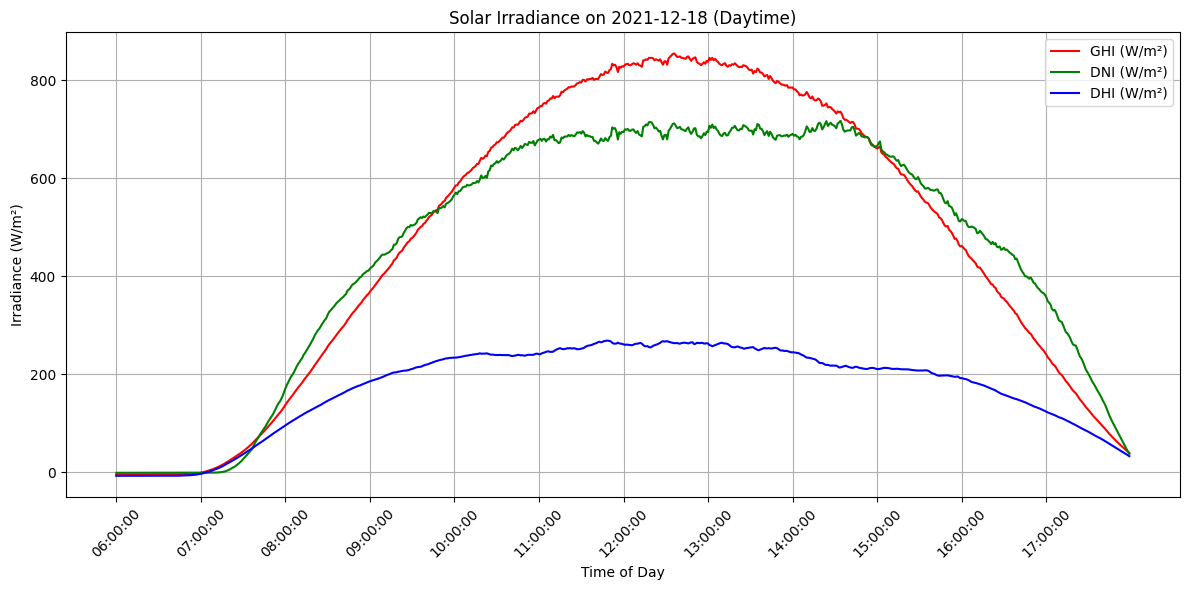

In [23]:
plot_day(
    df_bn,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=True,
    date="2021-12-18",
)

Selected Date: 2021-12-18


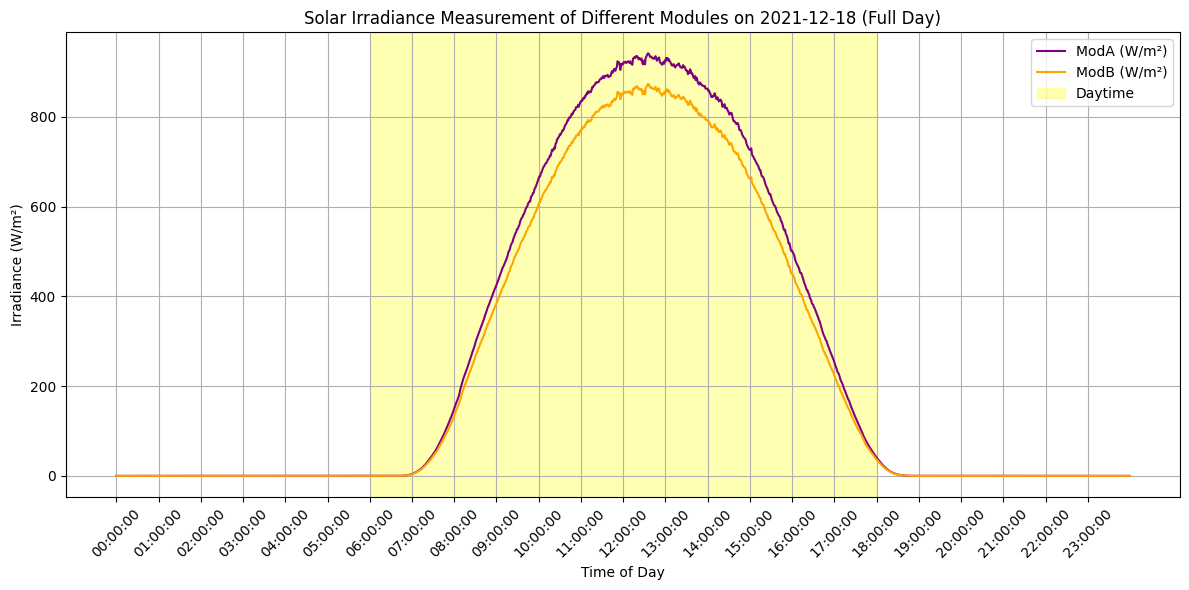

In [24]:
plot_day(
    df_bn,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)", "color": "purple"},
        {"column": "ModB", "label": "ModB (W/m²)", "color": "orange"},
    ],
    title="Solar Irradiance Measurement of Different Modules",
    ylabel="Irradiance (W/m²)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


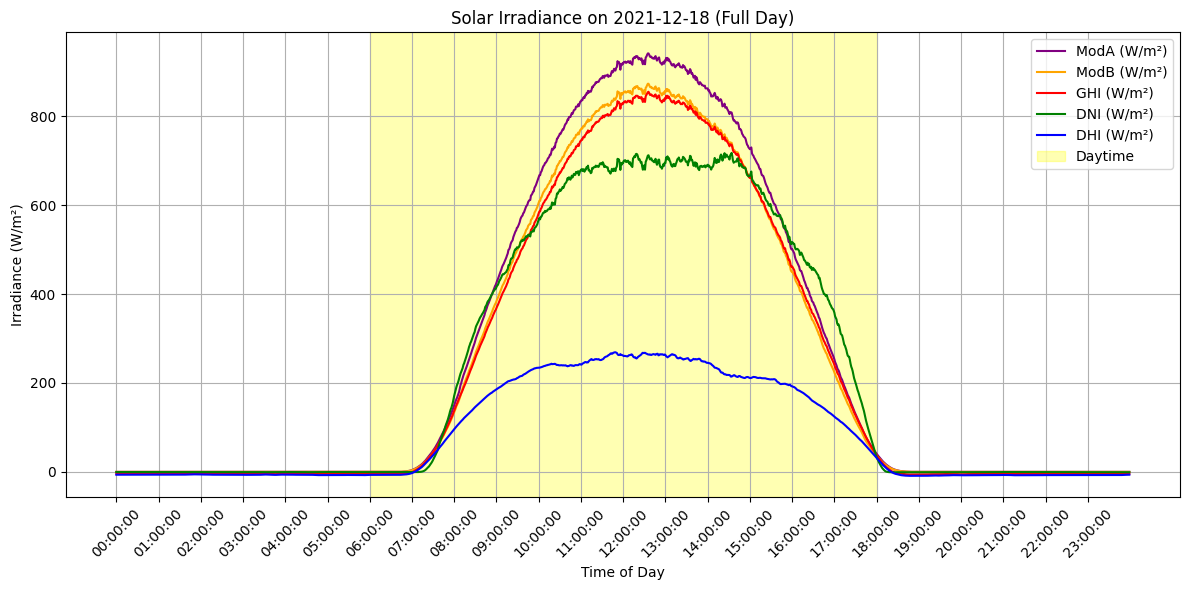

In [25]:
plot_day(
    df_bn,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)", "color": "purple"},
        {"column": "ModB", "label": "ModB (W/m²)", "color": "orange"},
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


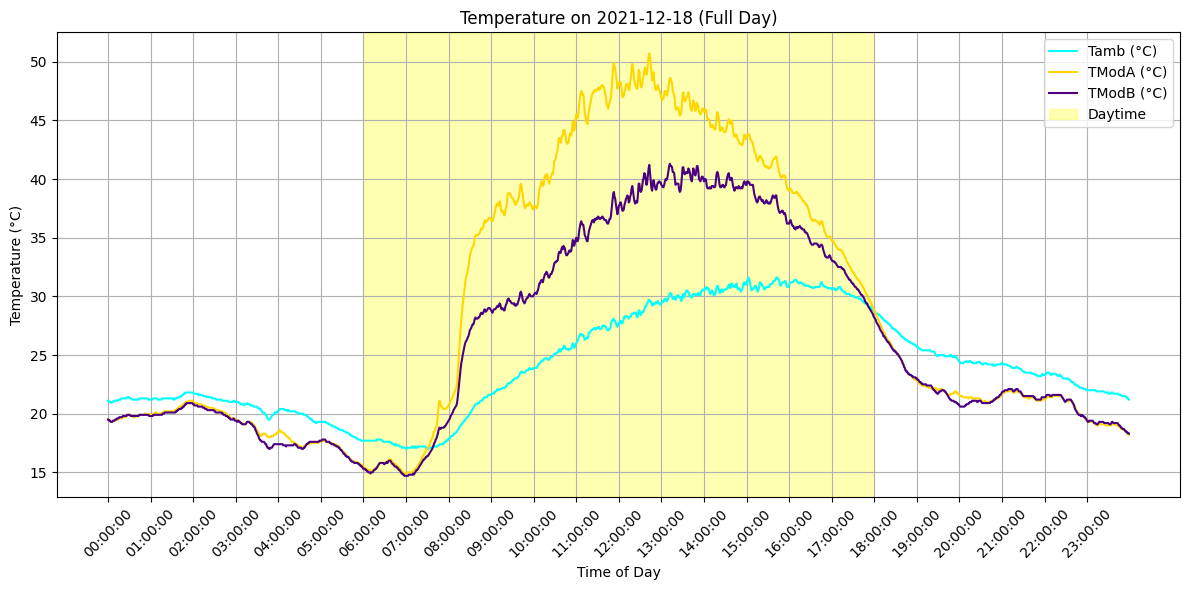

In [26]:
plot_day(
    df_bn,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "TModA", "label": "TModA (°C)", "color": "gold"},
        {"column": "TModB", "label": "TModB (°C)", "color": "indigo"},
    ],
    title="Temperature",
    ylabel="Temperature (°C)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


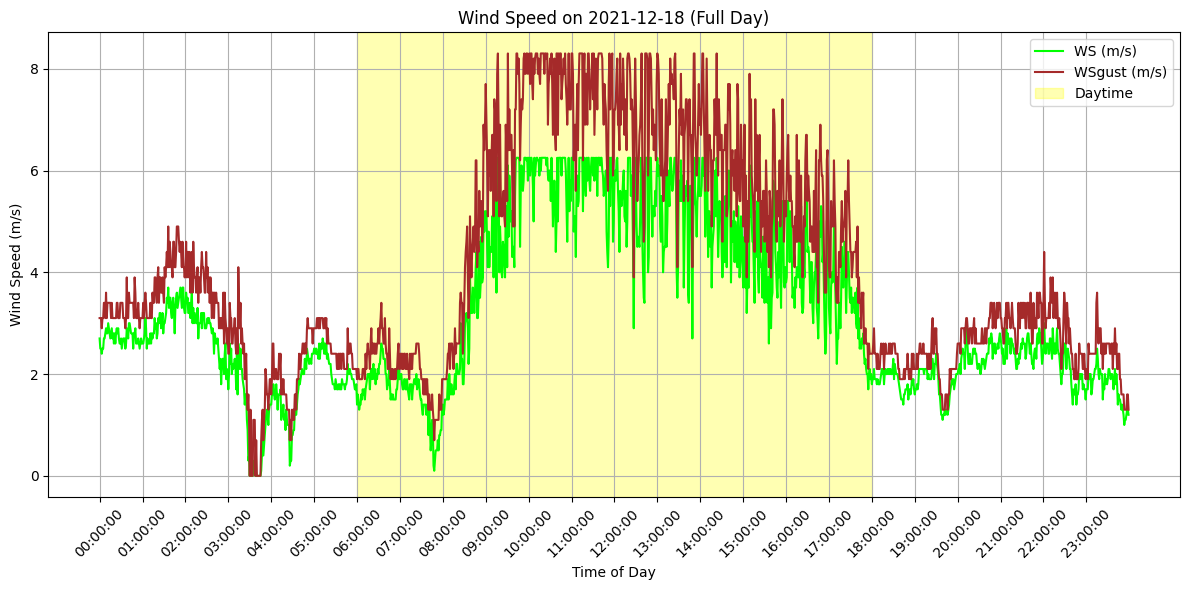

In [27]:
plot_day(
    df_bn,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Wind Speed",
    ylabel="Wind Speed (m/s)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


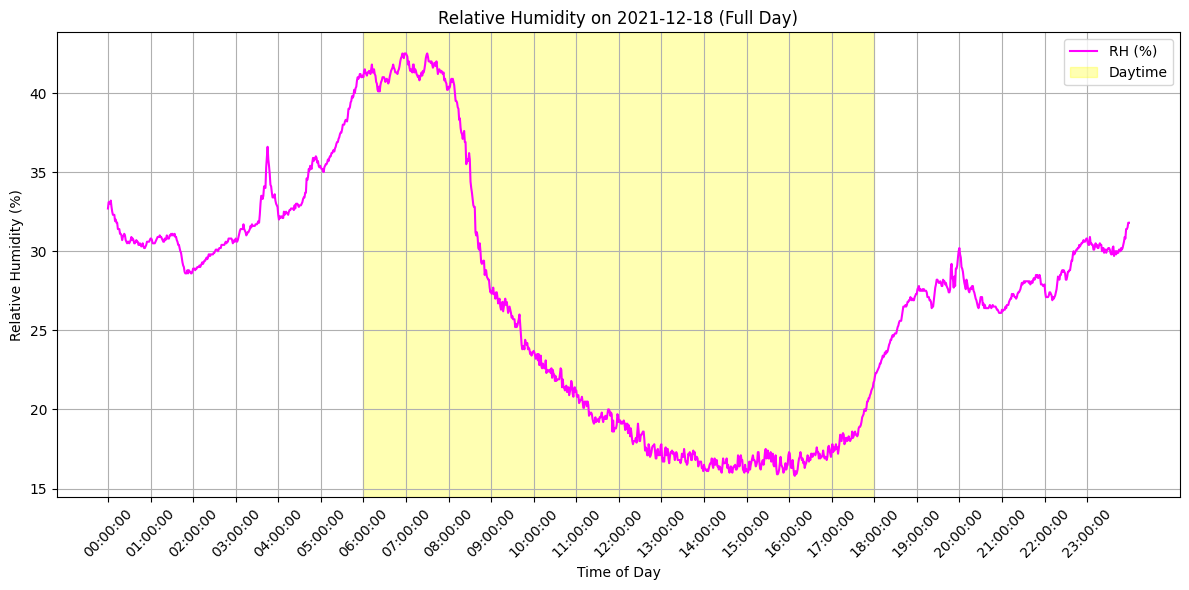

In [28]:
plot_day(
    df_bn,
    plot_data=[{"column": "RH", "label": "RH (%)", "color": "magenta"}],
    title="Relative Humidity",
    ylabel="Relative Humidity (%)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


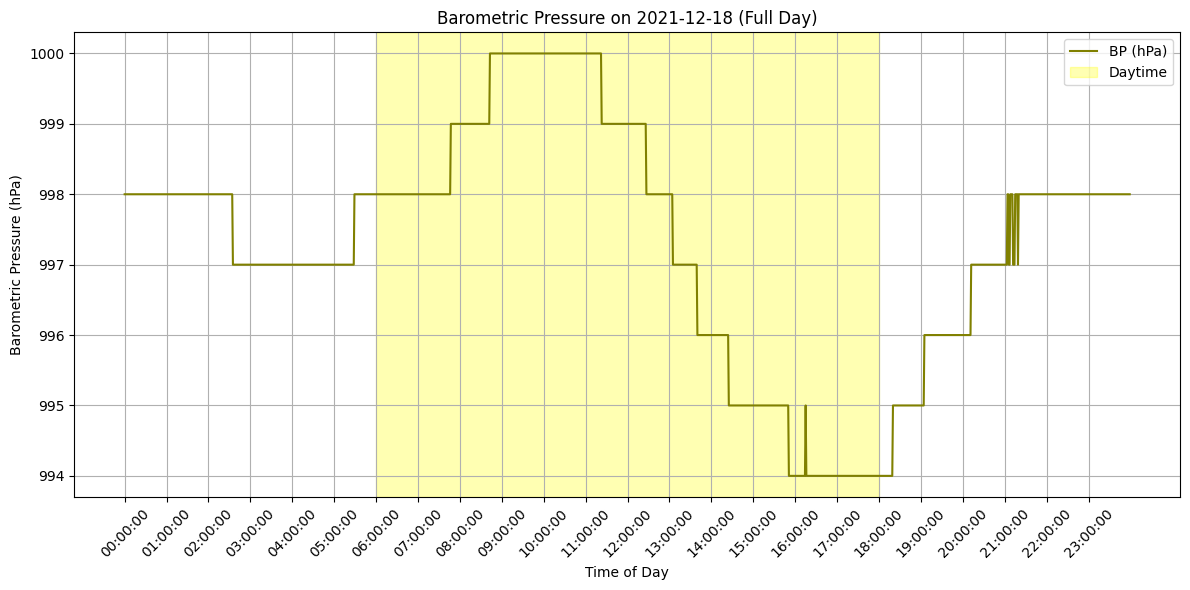

In [29]:
plot_day(
    df_bn,
    plot_data=[{"column": "BP", "label": "BP (hPa)", "color": "olive"}],
    title="Barometric Pressure",
    ylabel="Barometric Pressure (hPa)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-11-19


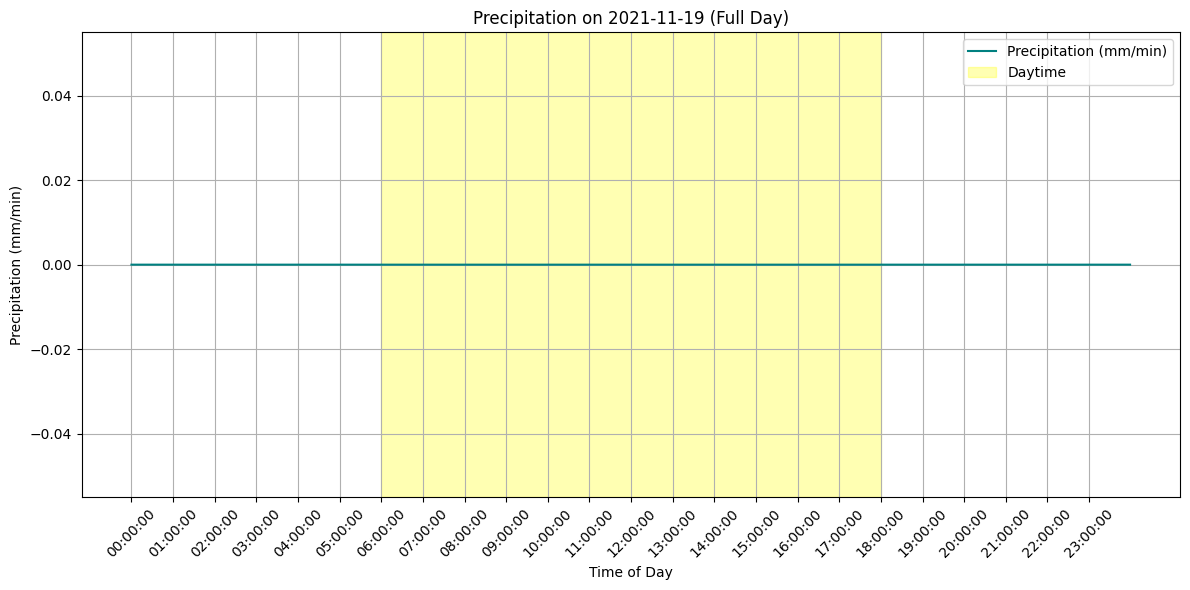

In [30]:
plot_day(
    df_bn,
    plot_data=[
        {"column": "Precipitation", "label": "Precipitation (mm/min)", "color": "teal"}
    ],
    title="Precipitation",
    ylabel="Precipitation (mm/min)",
    daytime_only=False,
    # date='2021-12-18'
    # date='2022-04-20'
)

Selected Date: 2021-12-18


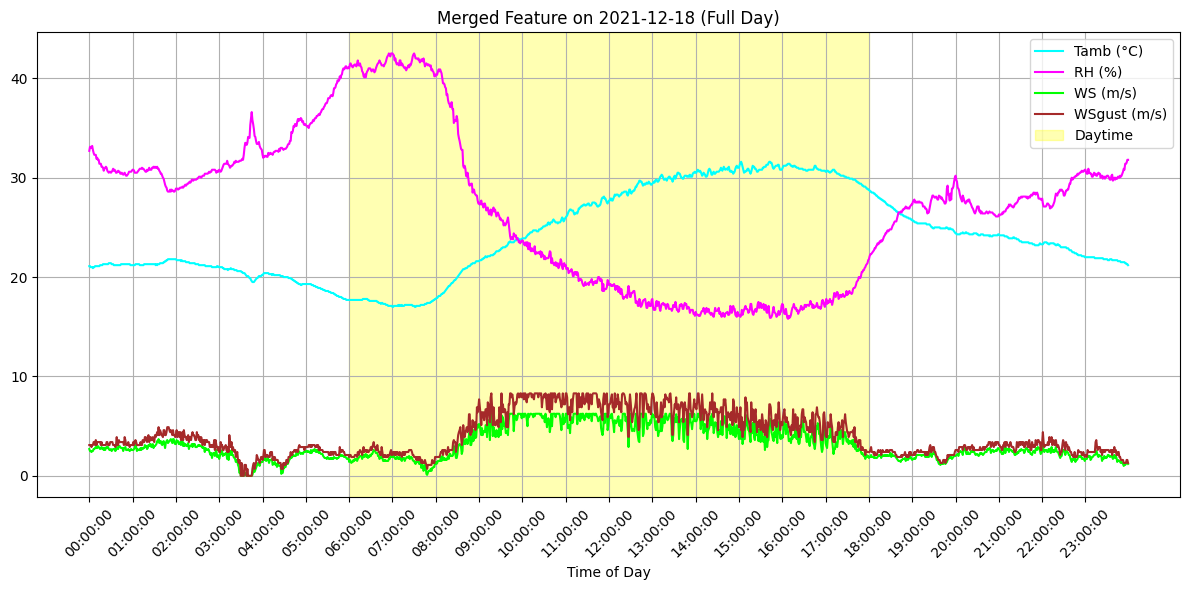

In [31]:
plot_day(
    df_bn,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "RH", "label": "RH (%)", "color": "magenta"},
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Merged Feature",
    ylabel="",
    daytime_only=False,
    date="2021-12-18",
)

### Monthly Time Series


In [32]:
def plot_month(df, plot_data, title, ylabel, daytime_only=True, month=None):
    """Plots the data feature for a randomly selected or specified month from the dataframe."""

    # Select the month: use provided month or choose randomly
    if not month:
        month = random.choice(df["month"].unique())

    print(f"Selected Month: {month}")

    # Filter the DataFrame for the selected month
    month_data = df[df["month"] == month]

    # Filter for daytime if daytime_only is True
    if daytime_only:
        month_data = month_data[
            (month_data.index.hour >= 6) & (month_data.index.hour < 18)
        ]

    plt.figure(figsize=(18, 6))

    # Plot the specified columns
    for data in plot_data:
        plt.plot(
            month_data.index,
            month_data[data["column"]],
            label=data["label"],
            color=data["color"],
        )

    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.title(
        f"{title} for {month_data['month_name'].iloc[0]} ({'Daytime' if daytime_only else 'Full Day'})"
    )
    plt.legend()
    plt.grid(True)

    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

Selected Month: 4


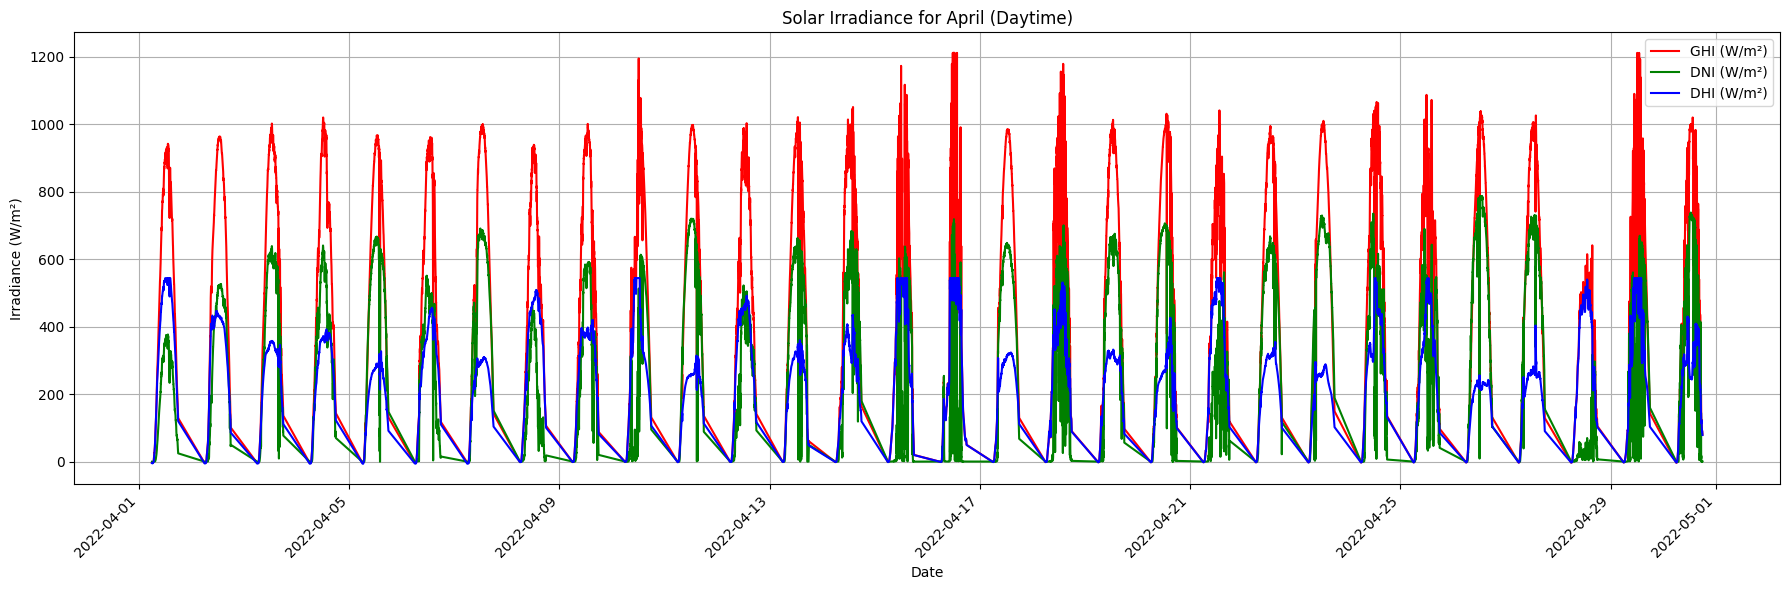

In [33]:
plot_month(
    df_bn,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=True,
    month=4,
)

Selected Month: 4


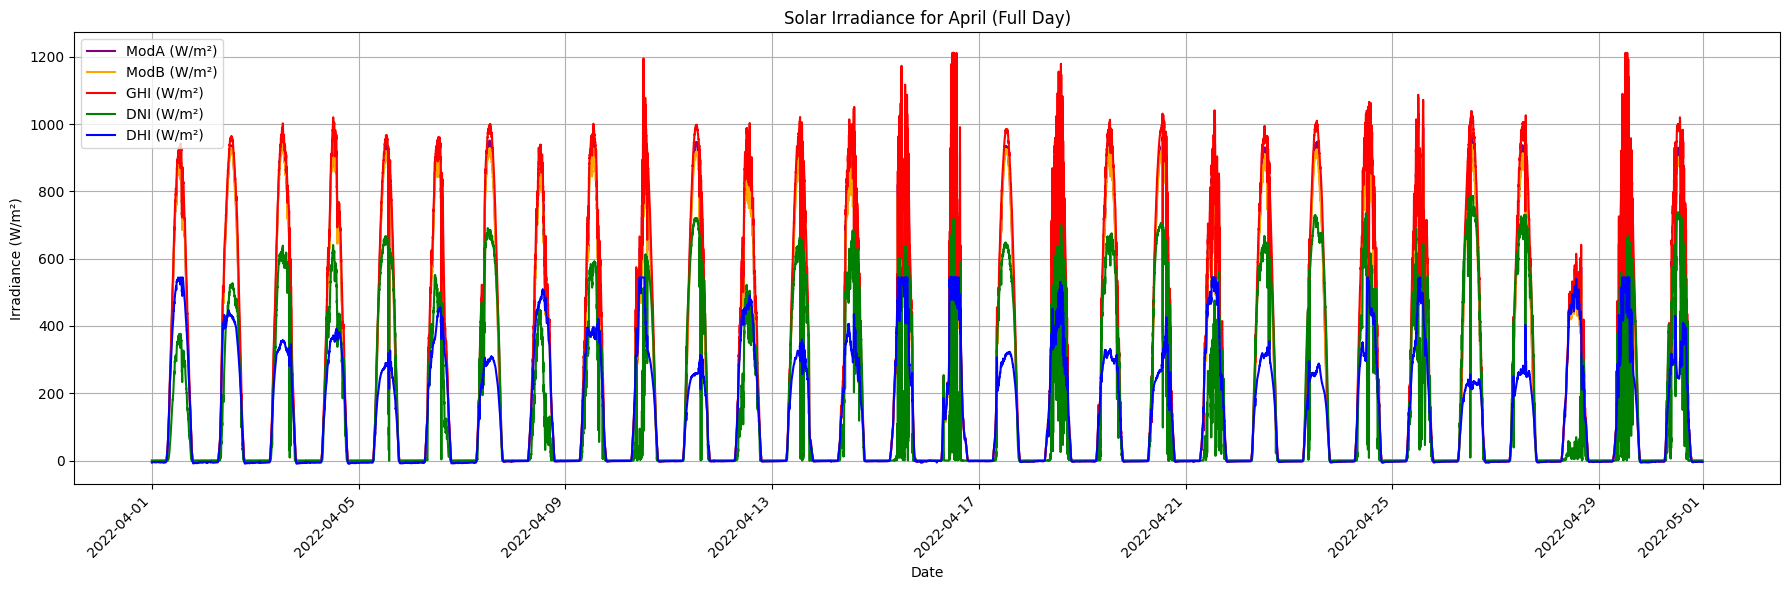

In [34]:
plot_month(
    df_bn,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)", "color": "purple"},
        {"column": "ModB", "label": "ModB (W/m²)", "color": "orange"},
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


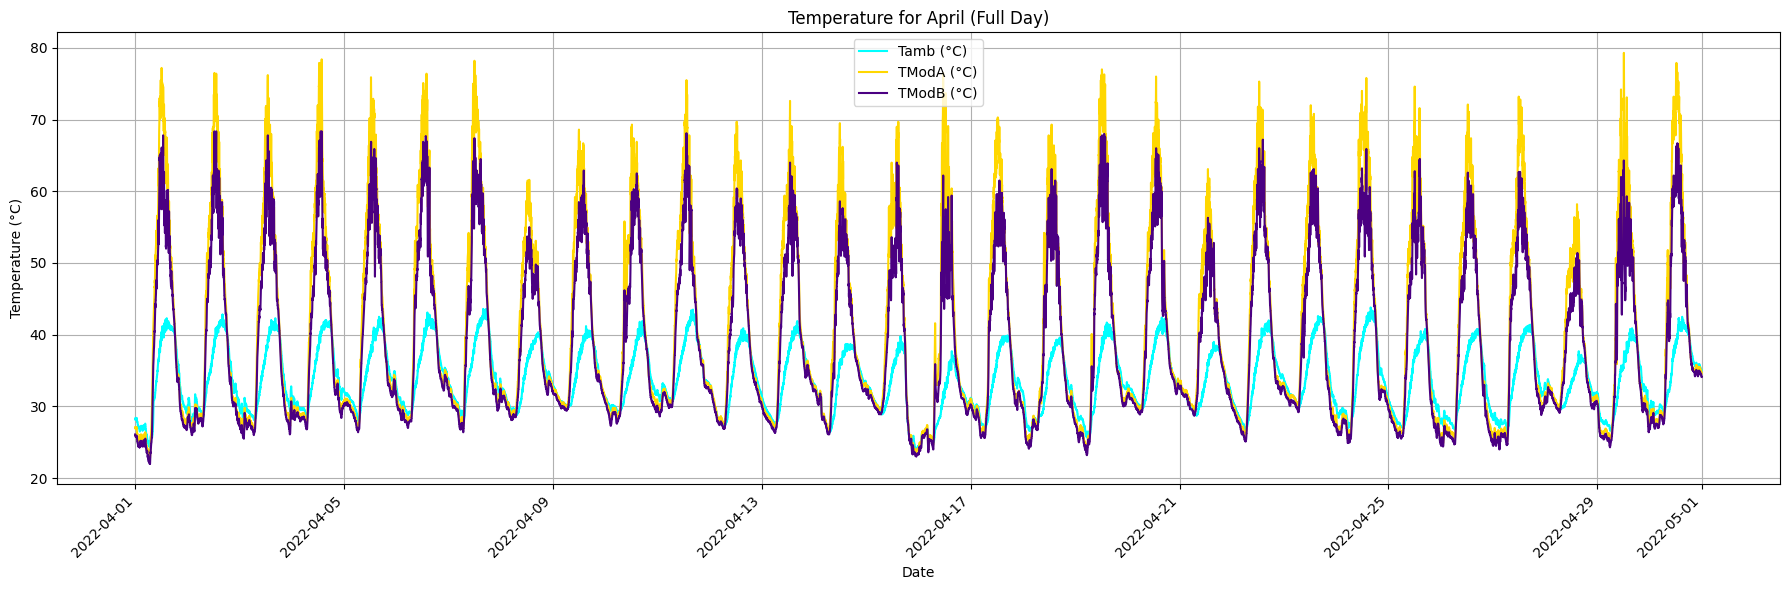

In [35]:
plot_month(
    df_bn,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "TModA", "label": "TModA (°C)", "color": "gold"},
        {"column": "TModB", "label": "TModB (°C)", "color": "indigo"},
    ],
    title="Temperature",
    ylabel="Temperature (°C)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


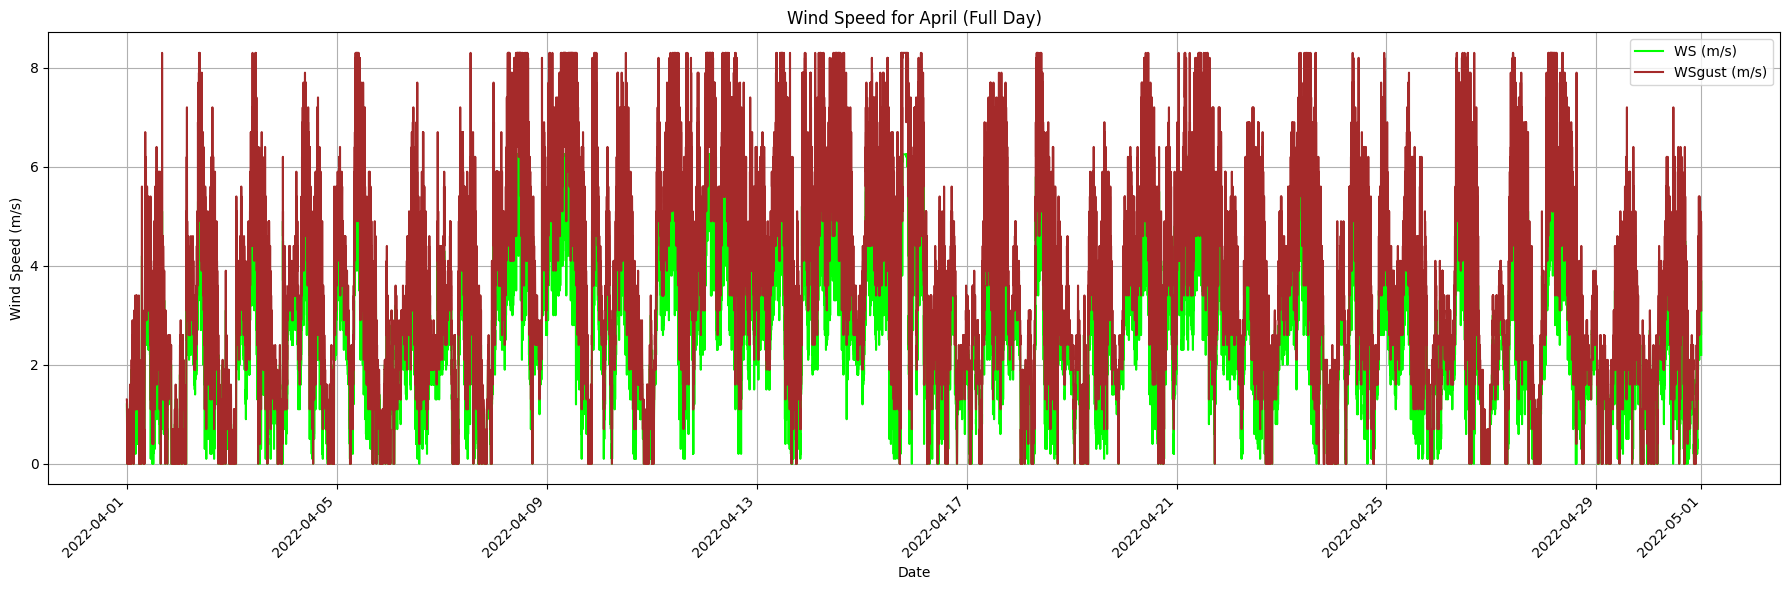

In [36]:
plot_month(
    df_bn,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Wind Speed",
    ylabel="Wind Speed (m/s)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


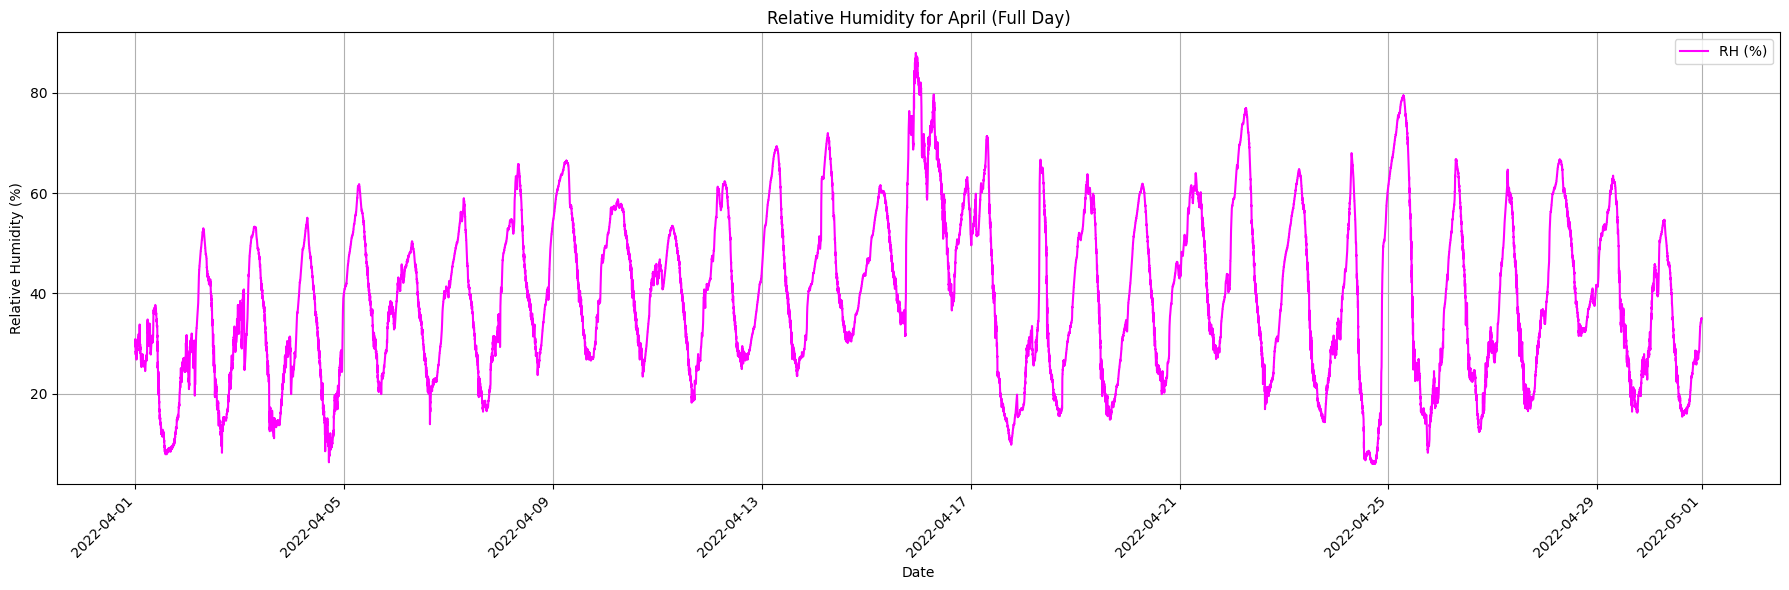

In [37]:
plot_month(
    df_bn,
    plot_data=[{"column": "RH", "label": "RH (%)", "color": "magenta"}],
    title="Relative Humidity",
    ylabel="Relative Humidity (%)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


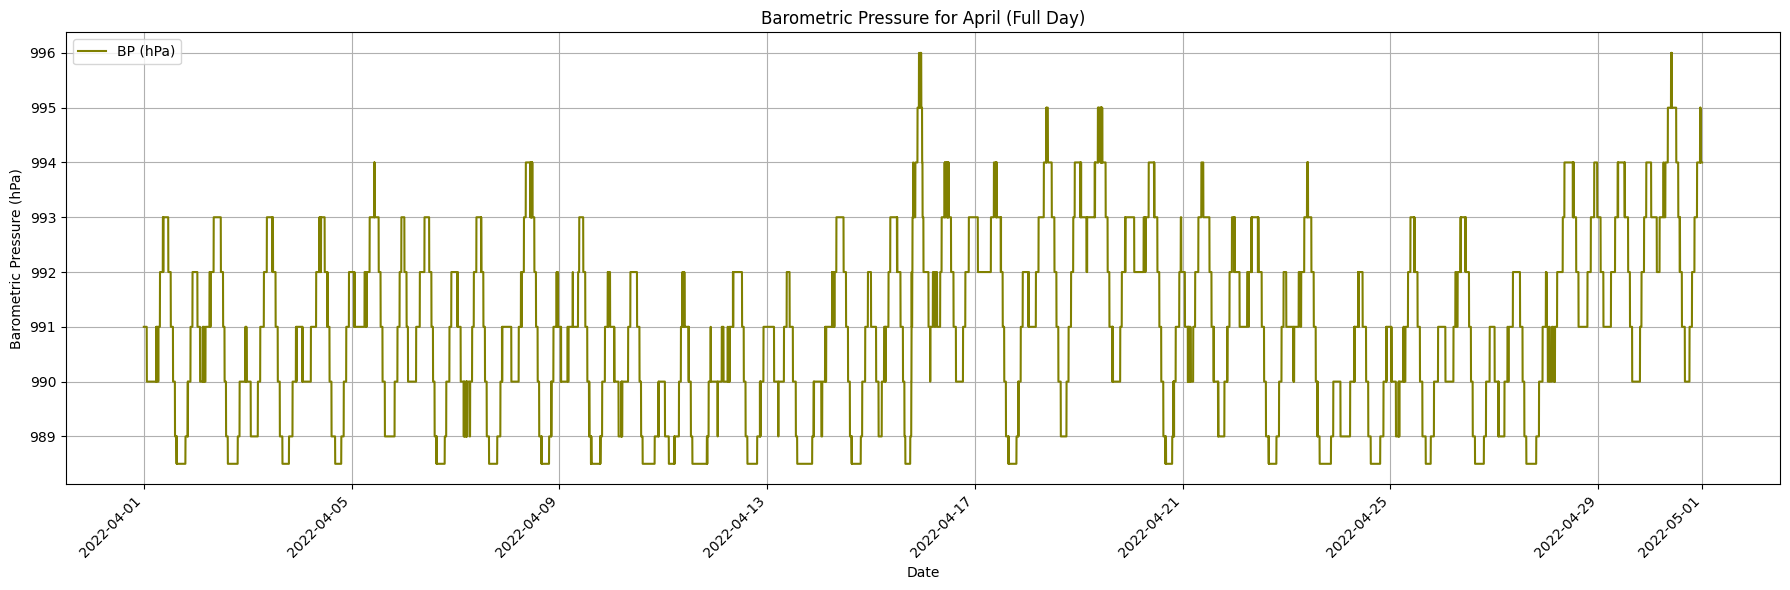

In [38]:
plot_month(
    df_bn,
    plot_data=[{"column": "BP", "label": "BP (hPa)", "color": "olive"}],
    title="Barometric Pressure",
    ylabel="Barometric Pressure (hPa)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


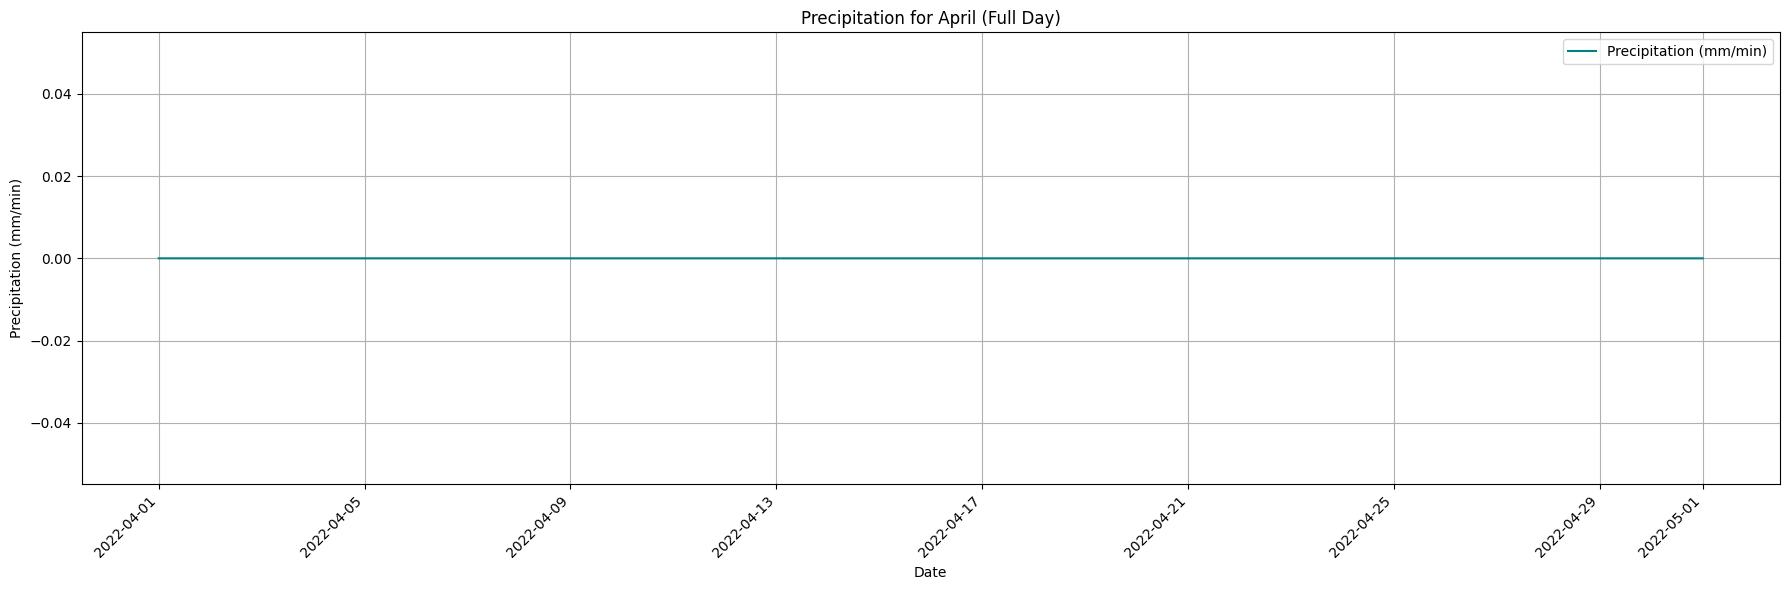

In [39]:
plot_month(
    df_bn,
    plot_data=[
        {"column": "Precipitation", "label": "Precipitation (mm/min)", "color": "teal"}
    ],
    title="Precipitation",
    ylabel="Precipitation (mm/min)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


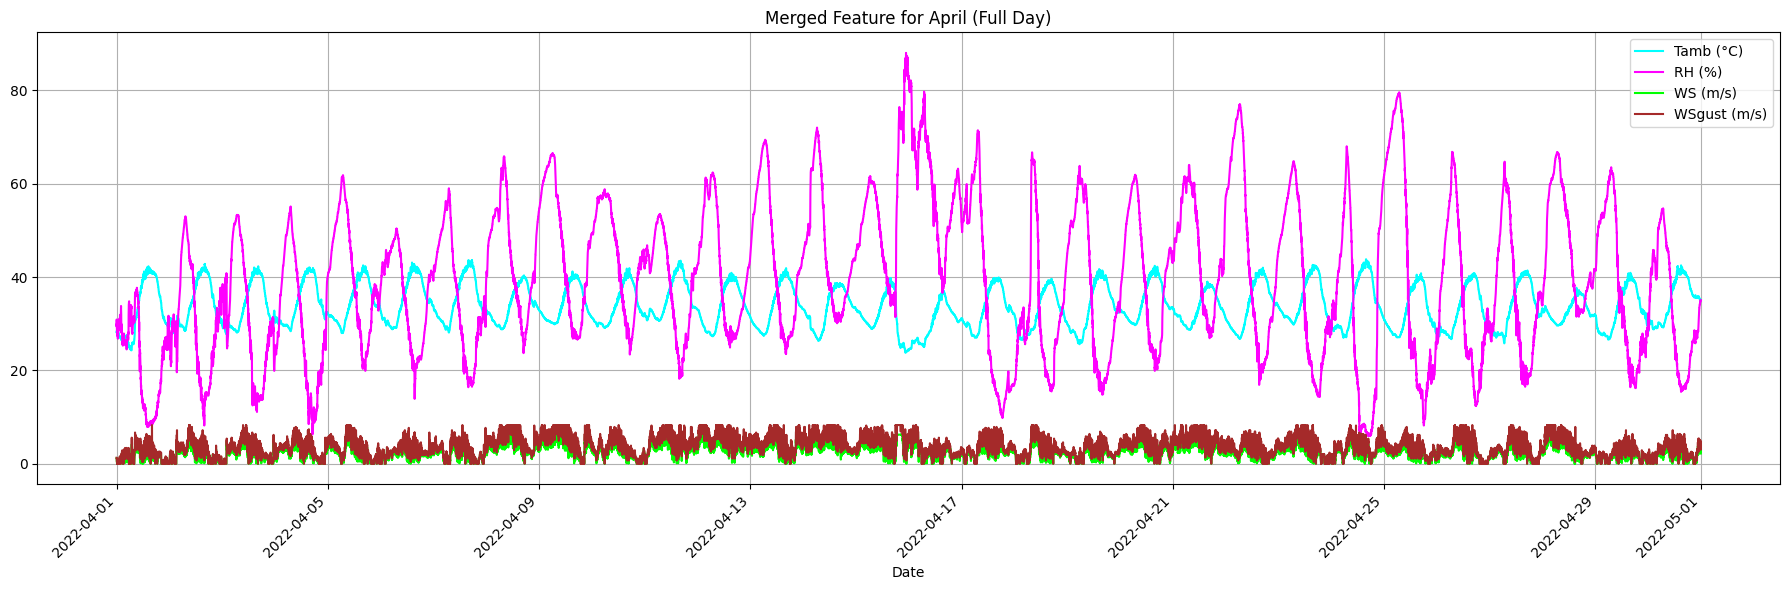

In [40]:
plot_month(
    df_bn,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "RH", "label": "RH (%)", "color": "magenta"},
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Merged Feature",
    ylabel="",
    daytime_only=False,
    month=4,
)

### Days of the Month Plots

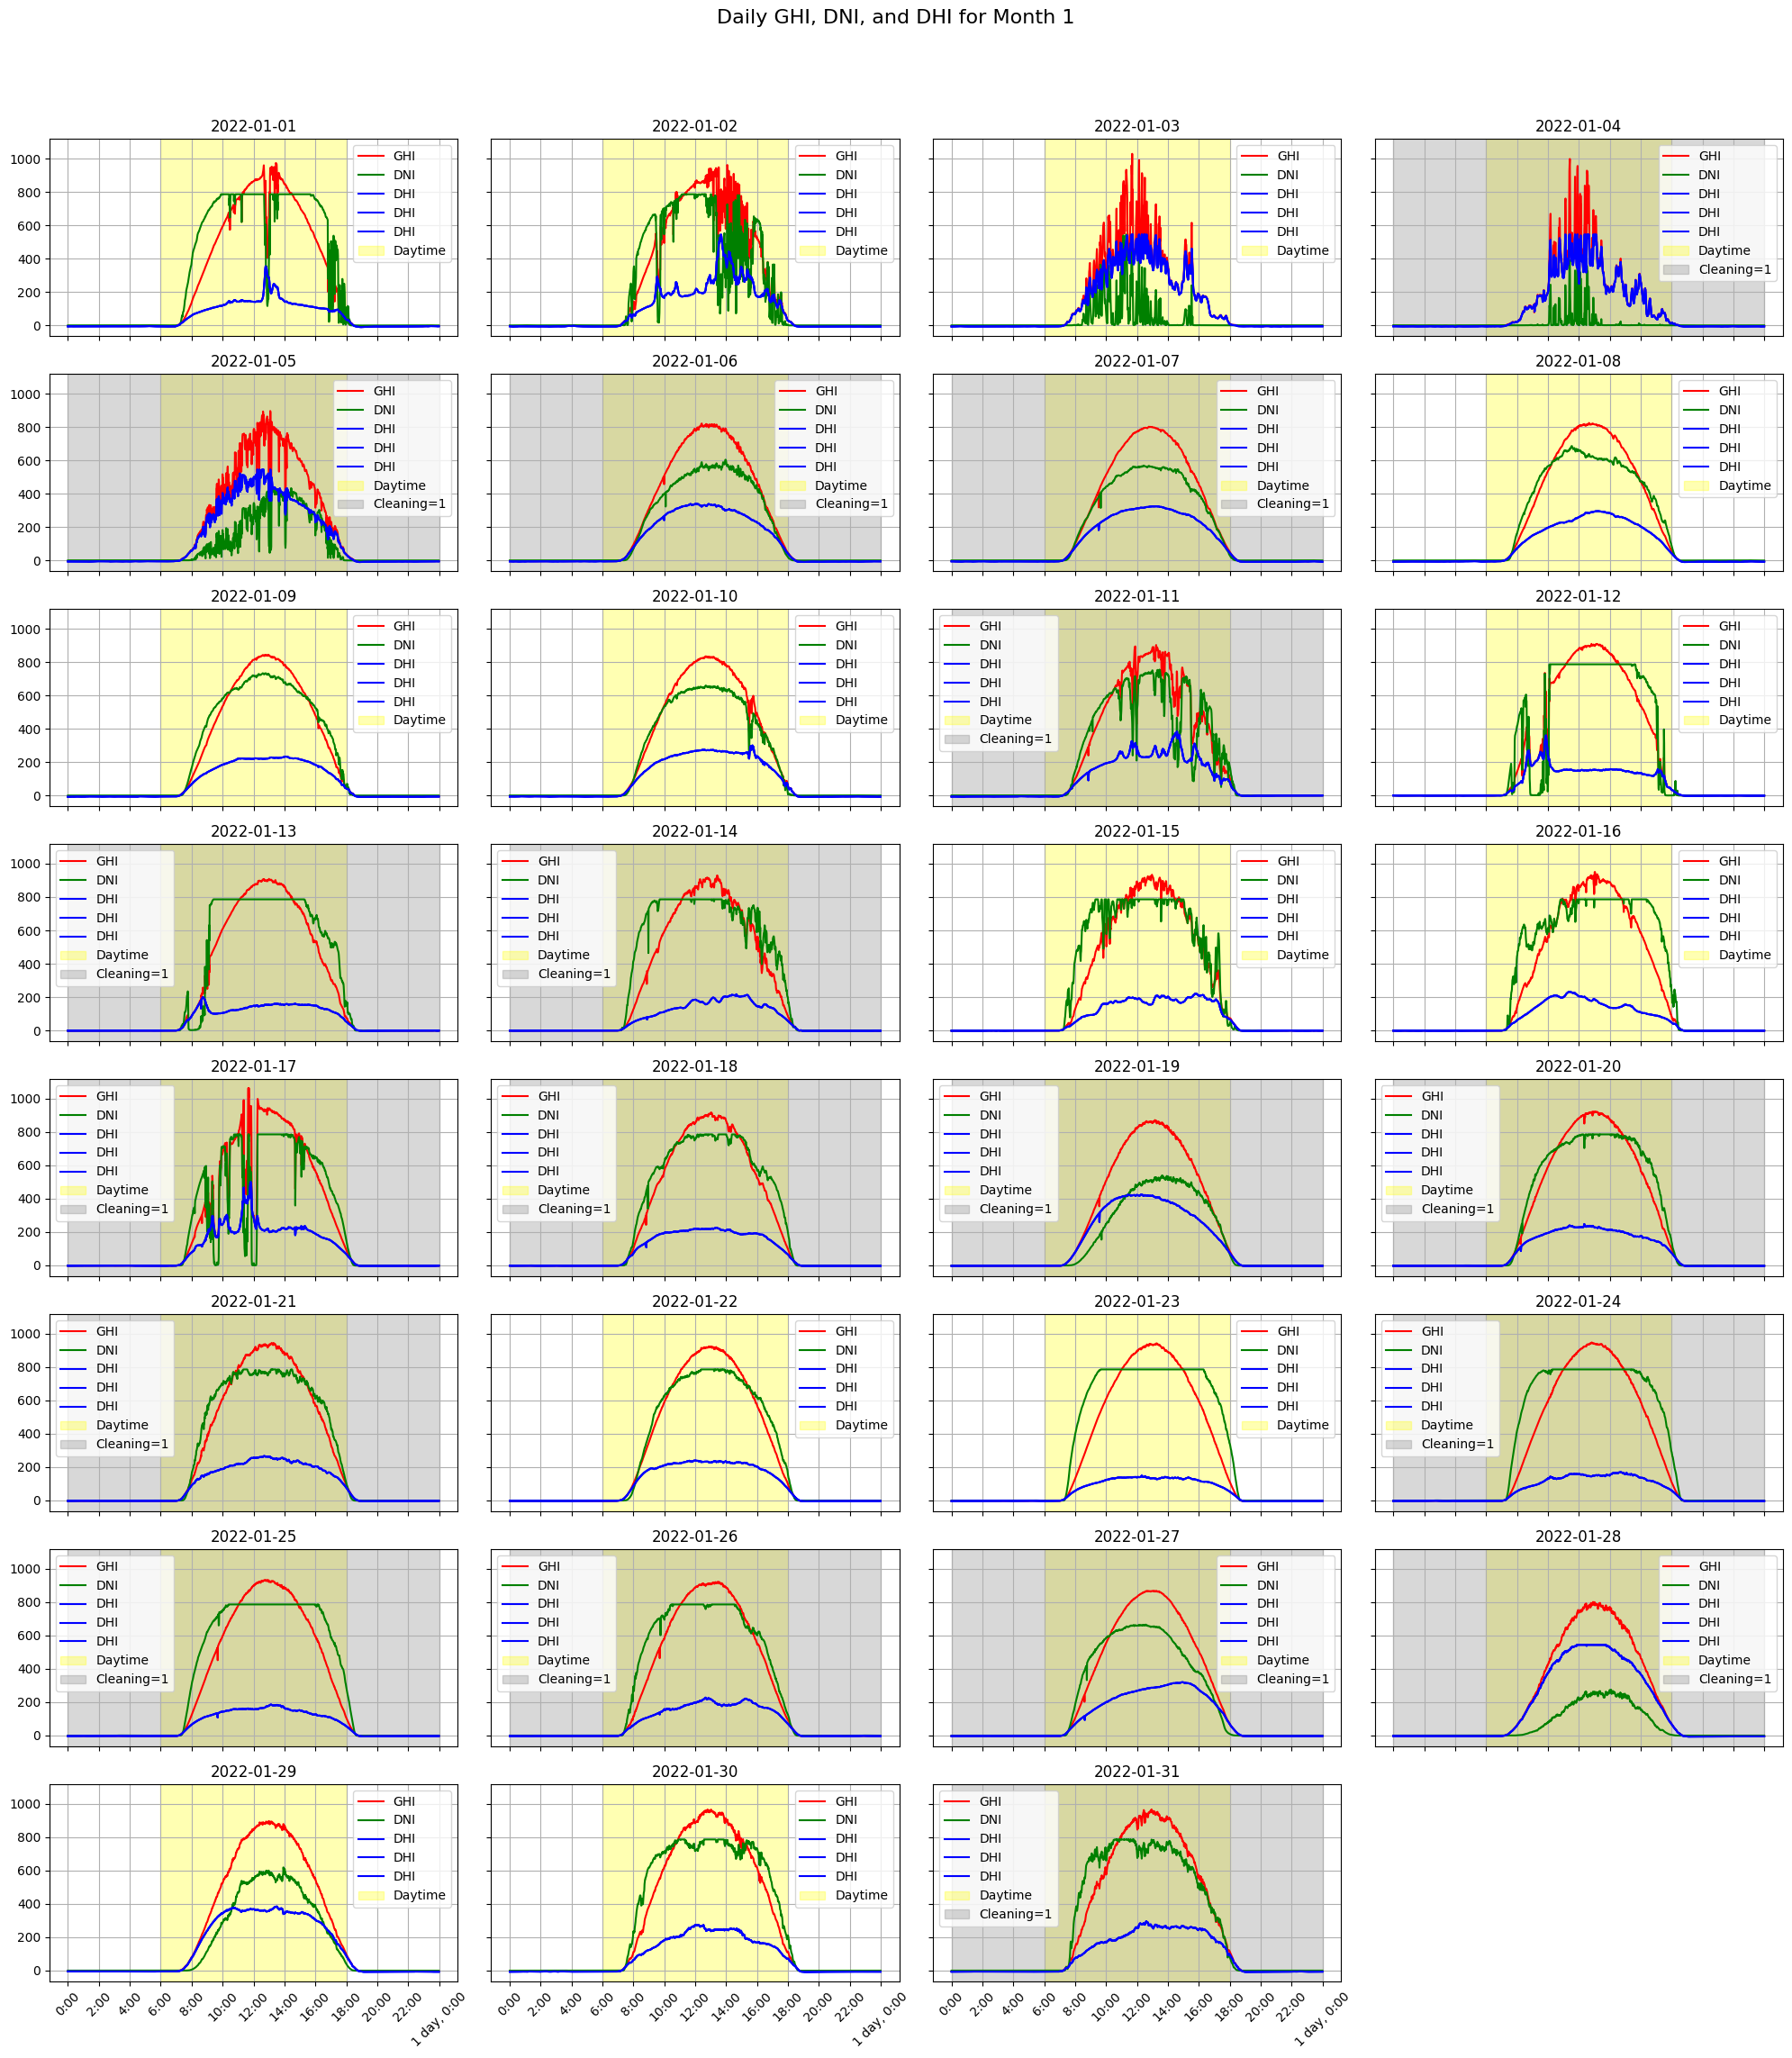

In [41]:
from datetime import timedelta

month_to_plot = 1

# Filter the DataFrame for the selected month
monthly_data = df_bn[df_bn.index.month == month_to_plot]
date_cleaned = monthly_data[monthly_data["Cleaning"] == 1]["date"].unique()


# Create a pivot table for each variable (GHI, DNI, DHI)
ghi_pivot = monthly_data.pivot_table(values="GHI", index="time", columns="date")
dni_pivot = monthly_data.pivot_table(values="DNI", index="time", columns="date")
dhi_pivot = monthly_data.pivot_table(values="DHI", index="time", columns="date")

# Get the number of days in the selected month
num_days = len(ghi_pivot.columns)

# Calculate the number of rows and columns for subplots
num_cols = 4
num_rows = (num_days + num_cols - 1) // num_cols

fig, axes = plt.subplots(
    num_rows, num_cols, figsize=(20, 3 * num_rows), sharex=True, sharey=True
)
fig.suptitle(f"Daily GHI, DNI, and DHI for Month {month_to_plot}", fontsize=16)


# Iterate through the days and plot the data
for i, date in enumerate(ghi_pivot.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Convert datetime.time objects to numerical values (total seconds since midnight)
    x_values = [t.hour * 3600 + t.minute * 60 + t.second for t in ghi_pivot.index]

    ax.plot(x_values, ghi_pivot[date], label="GHI", color="red")
    ax.plot(x_values, dni_pivot[date], label="DNI", color="green")
    ax.plot(x_values, dhi_pivot[date], label="DHI", color="blue")
    ax.plot(x_values, dhi_pivot[date], label="DHI", color="blue")
    ax.plot(x_values, dhi_pivot[date], label="DHI", color="blue")

    # Highlight daytime (6 AM to 6 PM)
    ax.axvspan(6 * 3600, 18 * 3600, color="yellow", alpha=0.3, label="Daytime")

    # hightlight the entire plot if cleaning column of month data == 1
    if date in date_cleaned:
        ax.axvspan(0, 24 * 3600, color="grey", alpha=0.3, label="Cleaning=1")

    ax.set_title(date.strftime("%Y-%m-%d"))
    ax.legend()
    ax.grid(True)

    # Convert seconds to HH:MM format for xticks
    xticks = range(0, 24 * 3600 + 1, 2 * 3600)  # 2-hour intervals
    xtick_labels = [str(timedelta(seconds=t))[:-3] for t in xticks]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=45)

# Hide any unused subplots
for i in range(num_days, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

Observations:
- Cleaning make the measurement a lot less noisy

## Histogram and Boxplots

In [42]:
def generate_hist_box_plots(df, plot_data, suptitle):
    """
    Generates histplots and boxplots for a list of dictionaries of title and column name.
    """

    num_cols = len(plot_data)
    fig, axes = plt.subplots(
        nrows=2,
        ncols=num_cols,
        figsize=(20, 5),
        sharey="row",
        sharex="col",
        gridspec_kw={"height_ratios": [7, 0.4]},
    )

    for i in range(len(plot_data)):
        sns.histplot(df[plot_data[i]["column"]], kde=True, ax=axes[0, i])
        sns.boxplot(x=df[plot_data[i]["column"]], ax=axes[1, i], orient="h")
        axes[1, i].set_xlabel(plot_data[i]["label"], fontsize=10)

    fig.suptitle(suptitle)
    fig.tight_layout()
    plt.show()

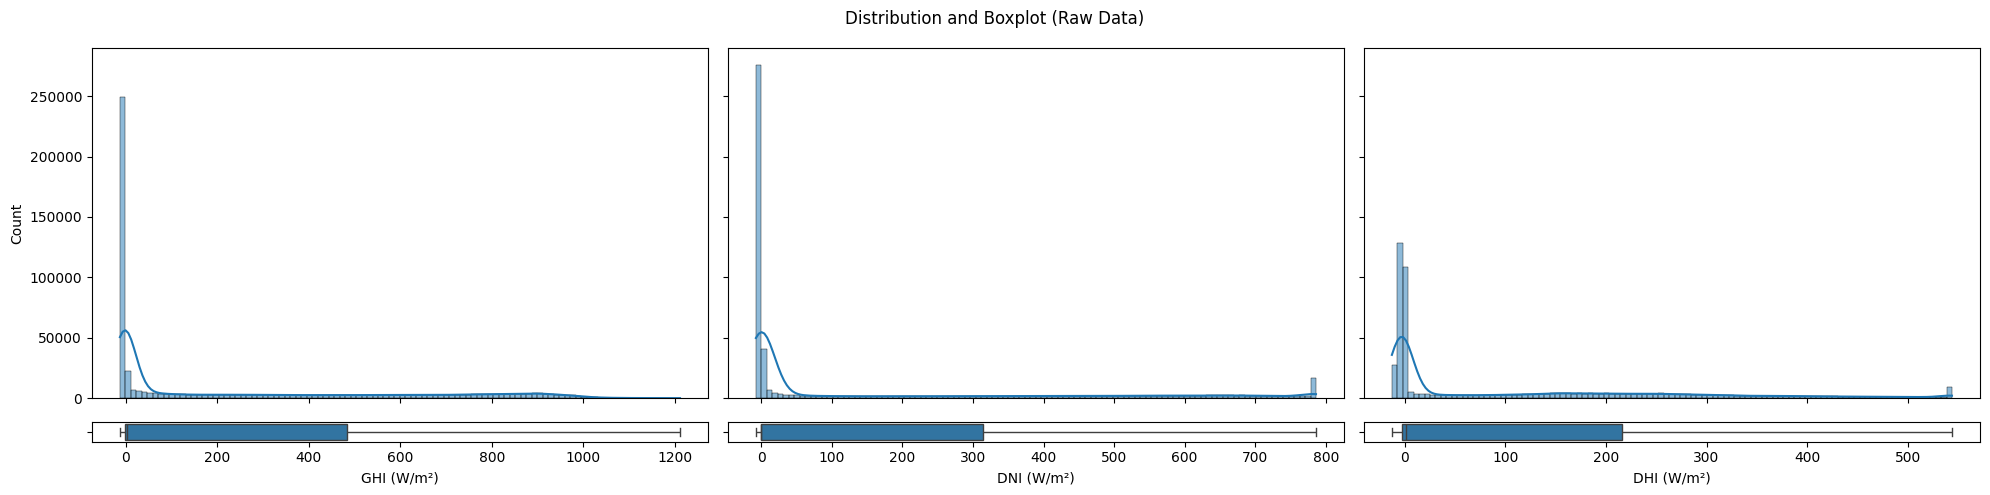

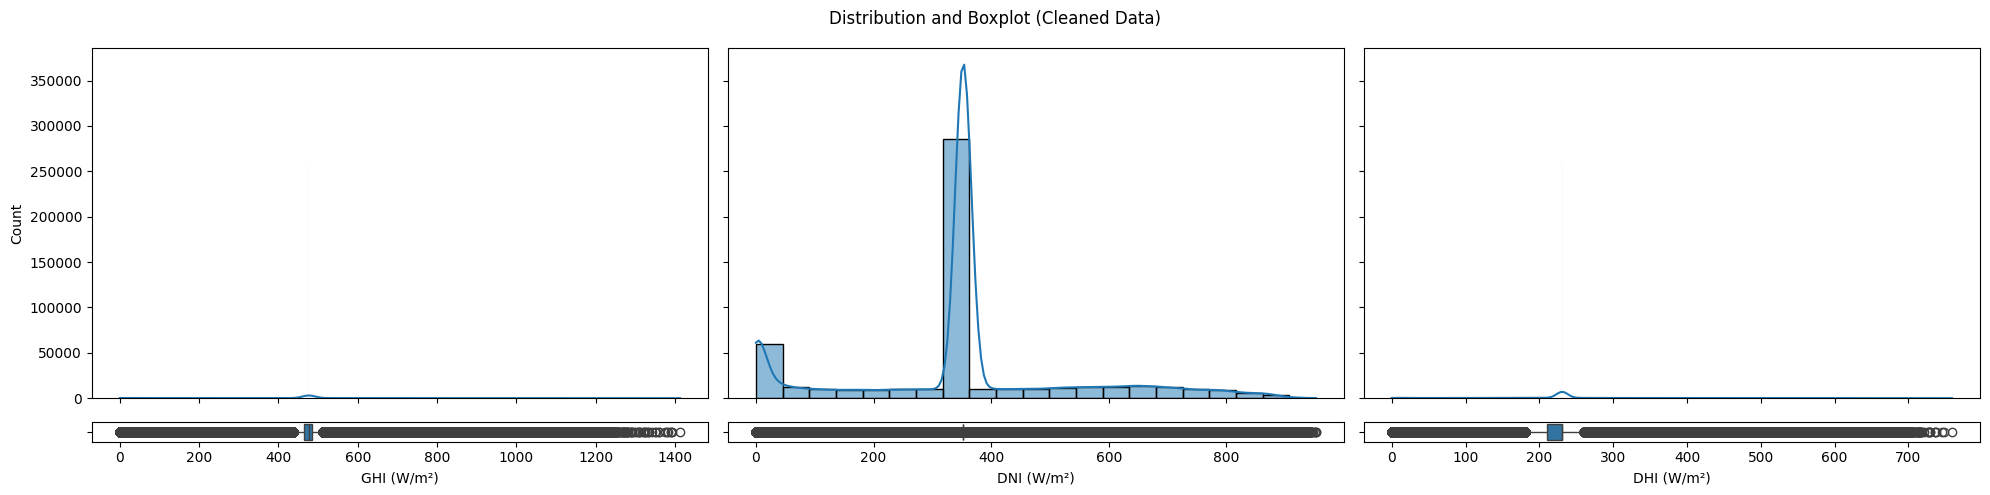

In [43]:
generate_hist_box_plots(
    df_bn,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)"},
        {"column": "DNI", "label": "DNI (W/m²)"},
        {"column": "DHI", "label": "DHI (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)

generate_hist_box_plots(
    df_bn_cleaned,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)"},
        {"column": "DNI", "label": "DNI (W/m²)"},
        {"column": "DHI", "label": "DHI (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

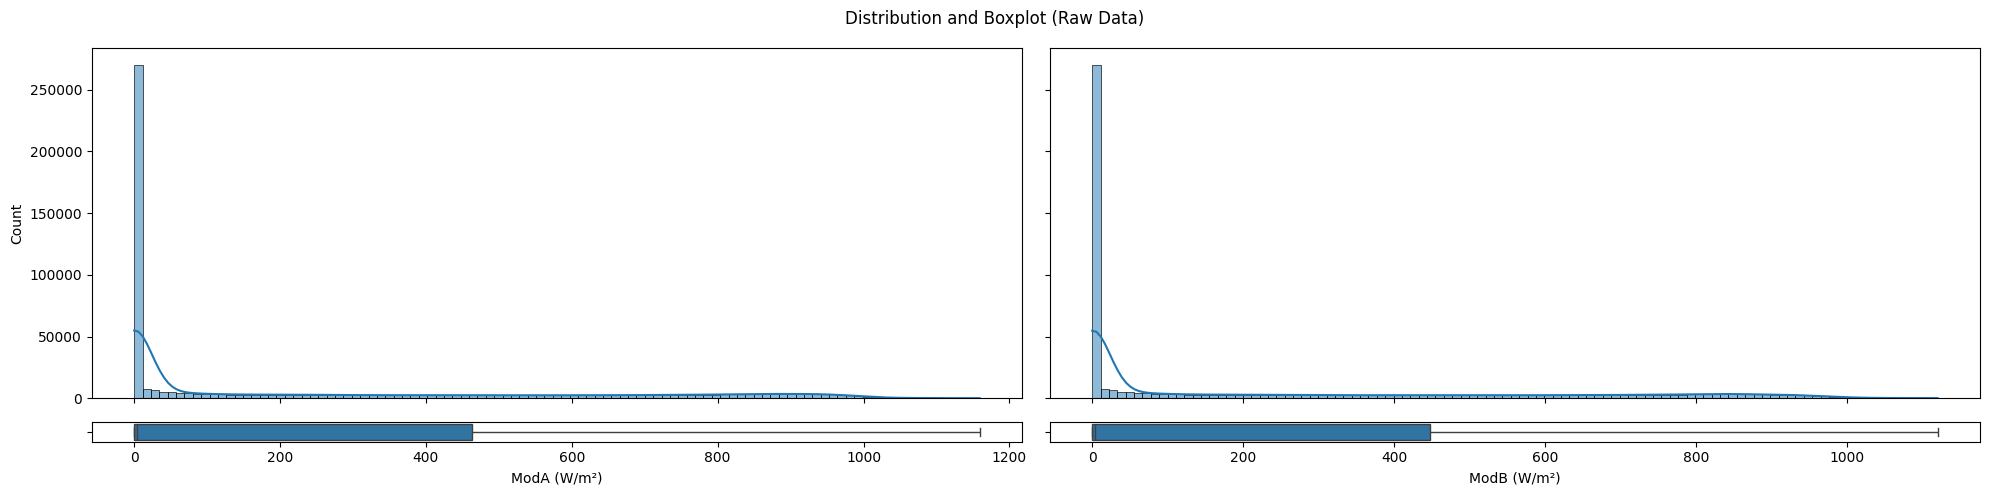

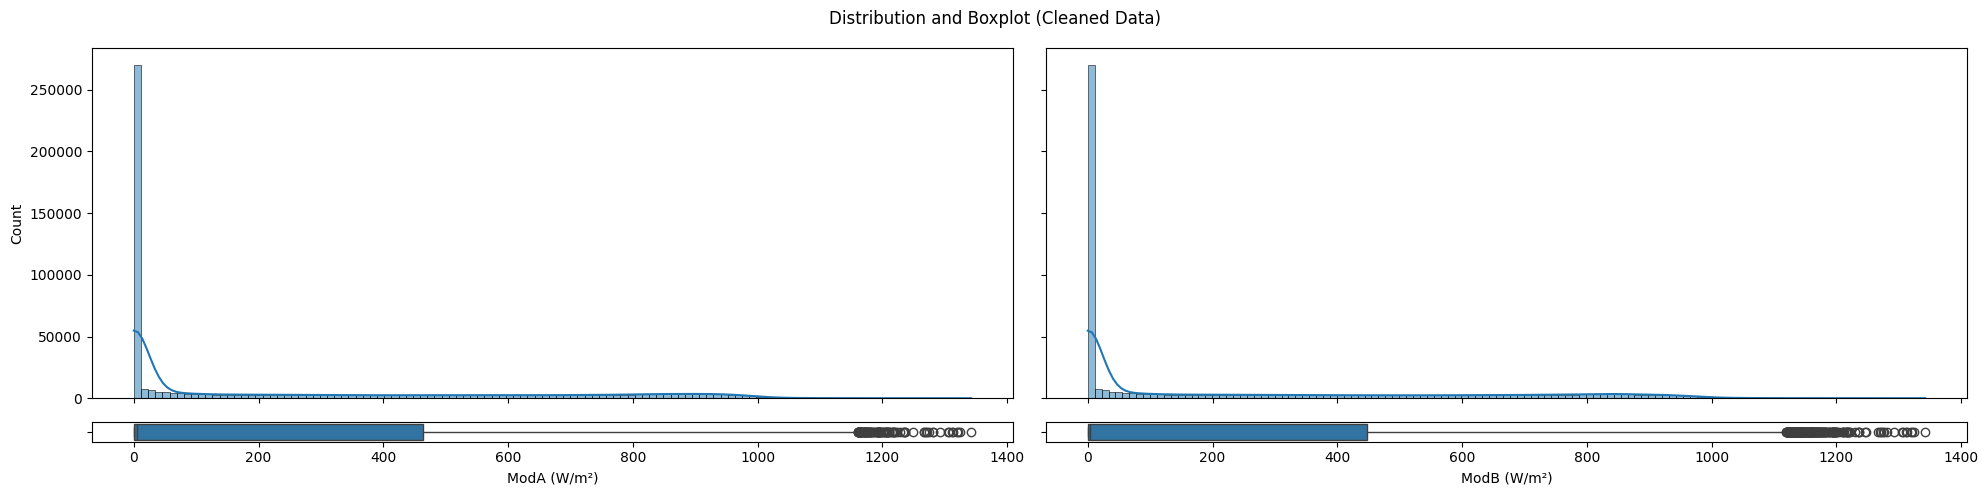

In [44]:
generate_hist_box_plots(
    df_bn,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)"},
        {"column": "ModB", "label": "ModB (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)
generate_hist_box_plots(
    df_bn_cleaned,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)"},
        {"column": "ModB", "label": "ModB (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

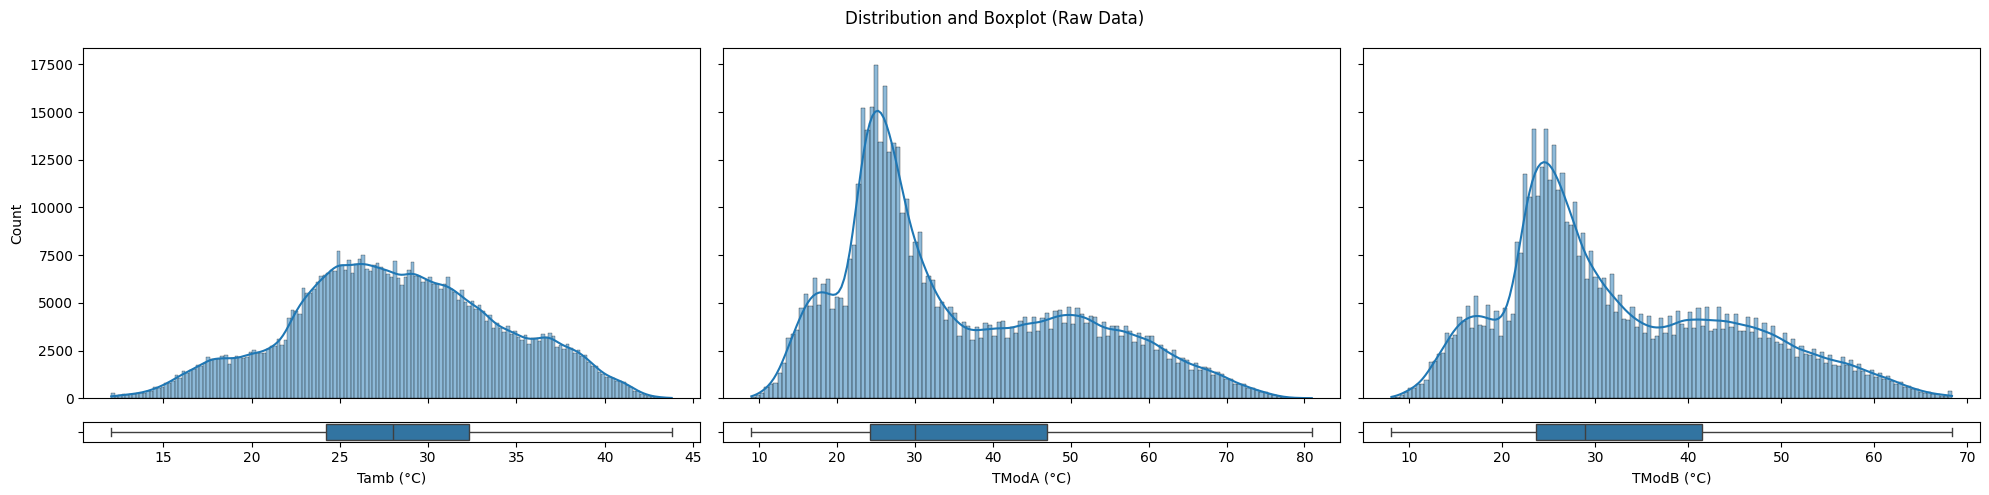

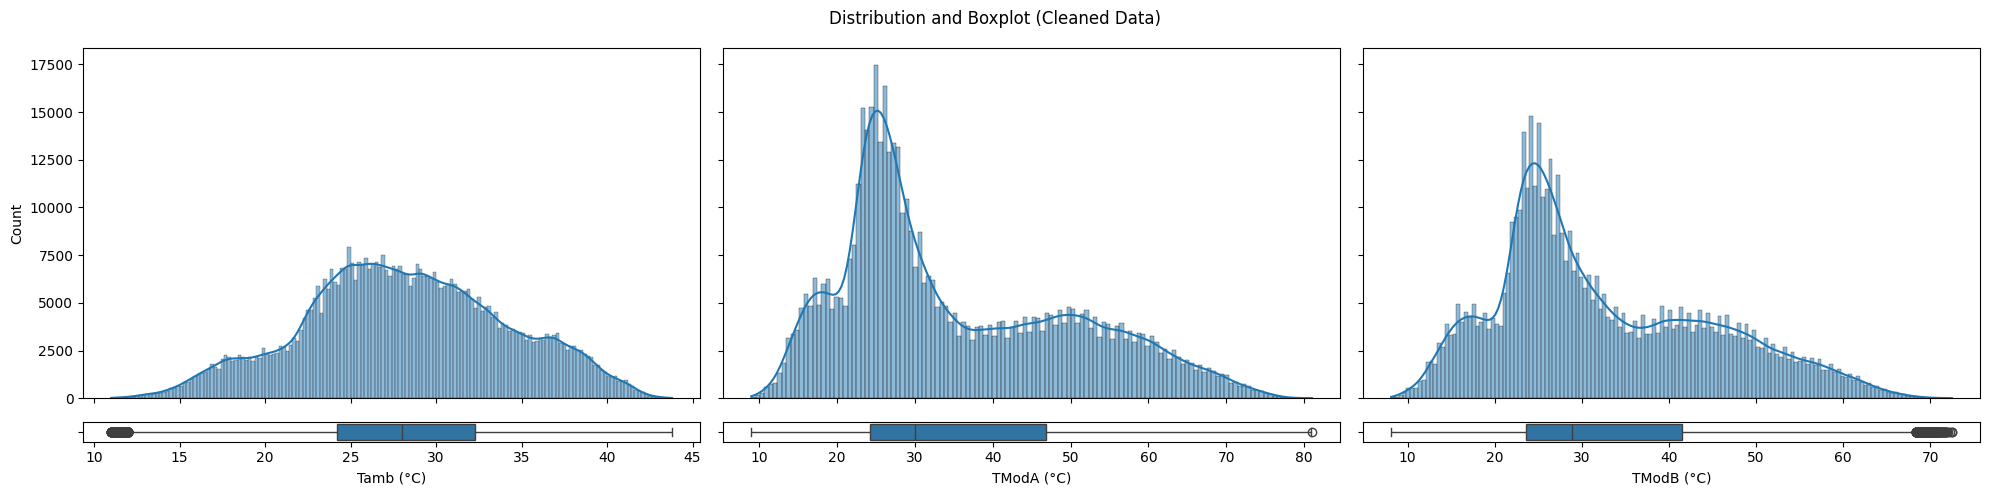

In [45]:
generate_hist_box_plots(
    df_bn,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)"},
        {"column": "TModA", "label": "TModA (°C)"},
        {"column": "TModB", "label": "TModB (°C)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)

generate_hist_box_plots(
    df_bn_cleaned,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)"},
        {"column": "TModA", "label": "TModA (°C)"},
        {"column": "TModB", "label": "TModB (°C)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

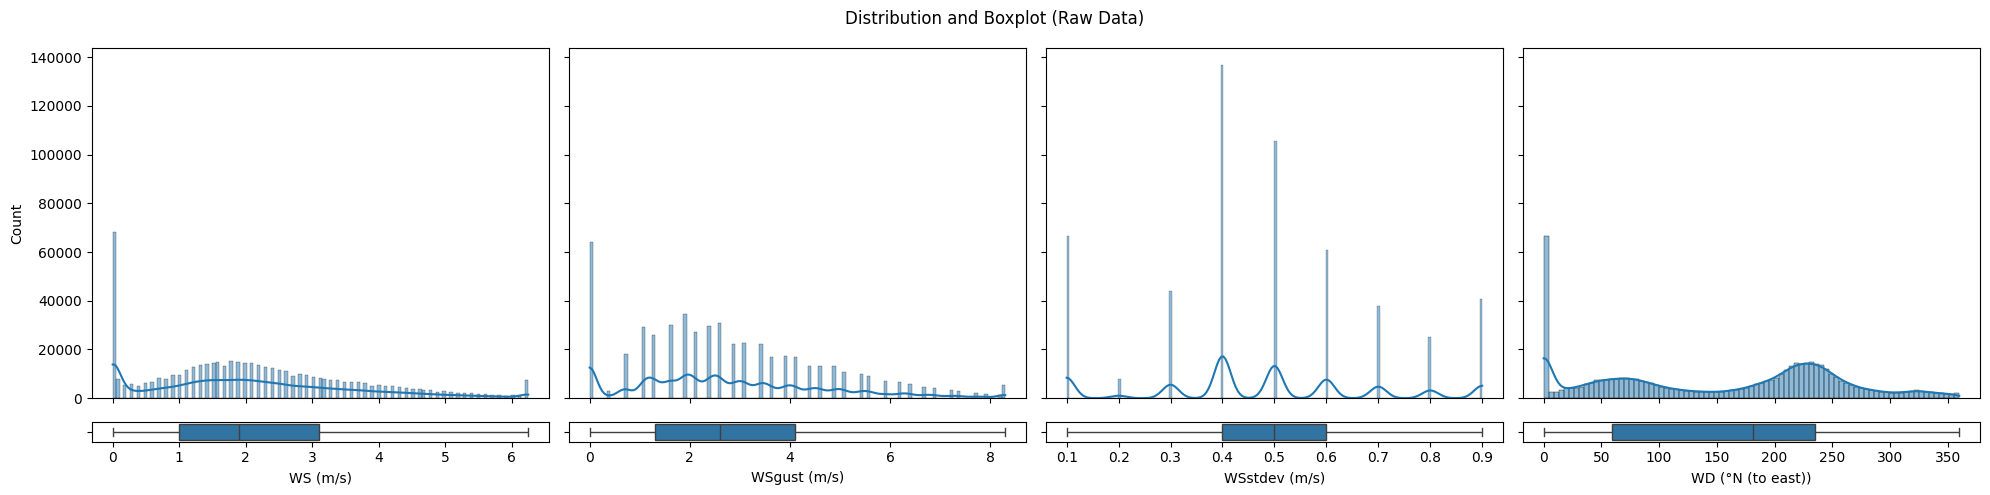

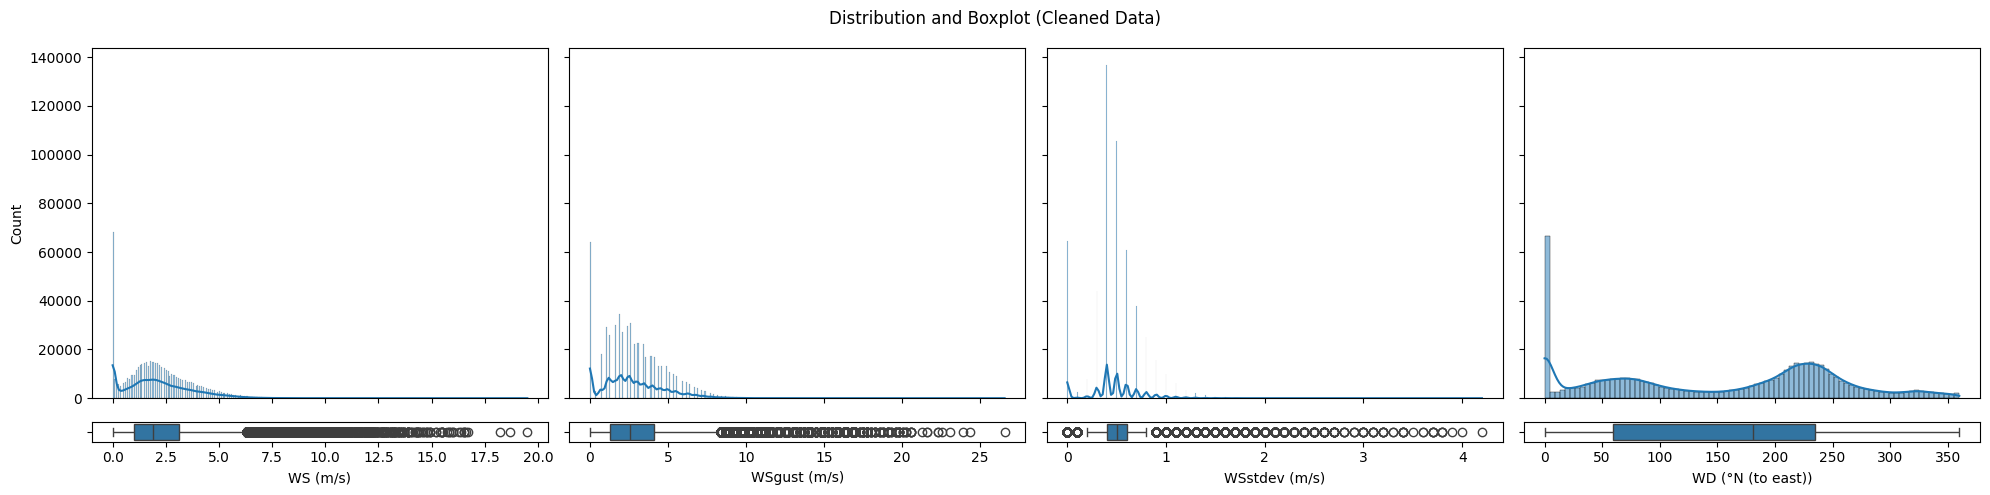

In [46]:
generate_hist_box_plots(
    df_bn,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)"},
        {"column": "WSgust", "label": "WSgust (m/s)"},
        {"column": "WSstdev", "label": "WSstdev (m/s)"},
        {"column": "WD", "label": "WD (°N (to east))"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)
generate_hist_box_plots(
    df_bn_cleaned,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)"},
        {"column": "WSgust", "label": "WSgust (m/s)"},
        {"column": "WSstdev", "label": "WSstdev (m/s)"},
        {"column": "WD", "label": "WD (°N (to east))"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

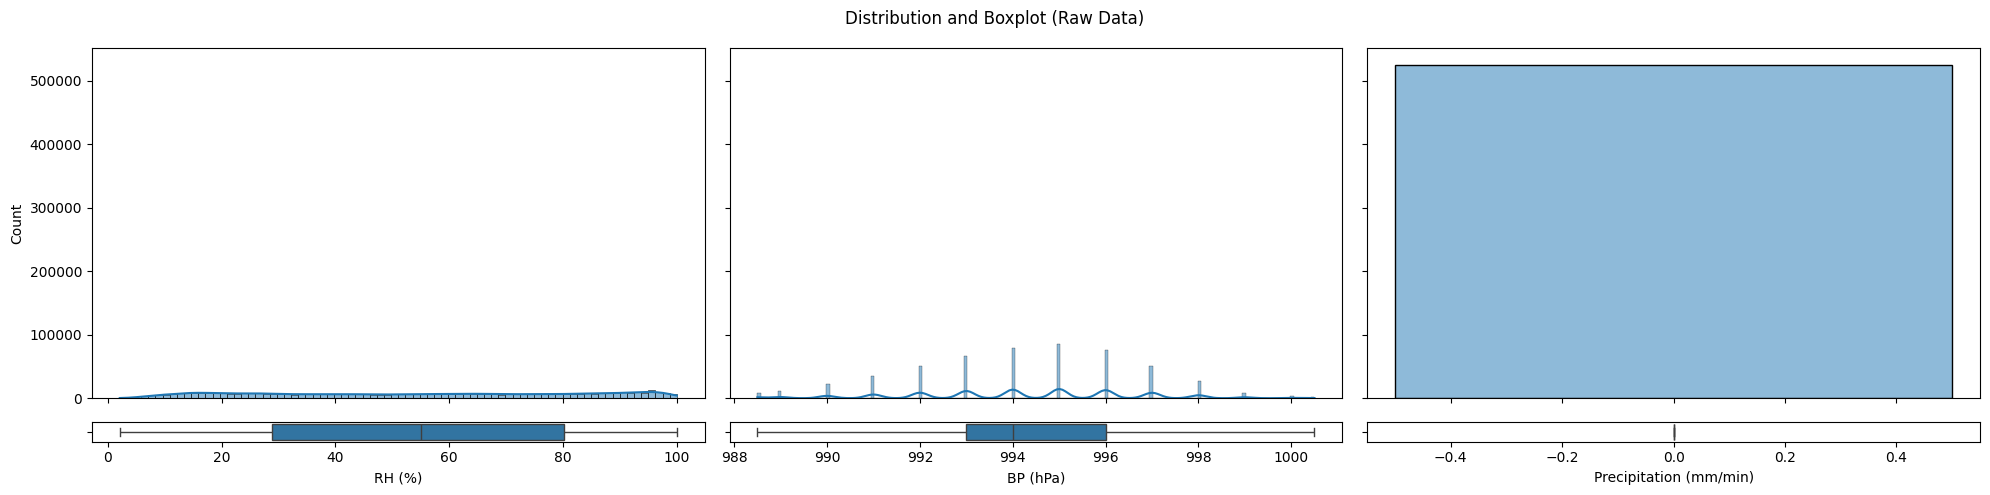

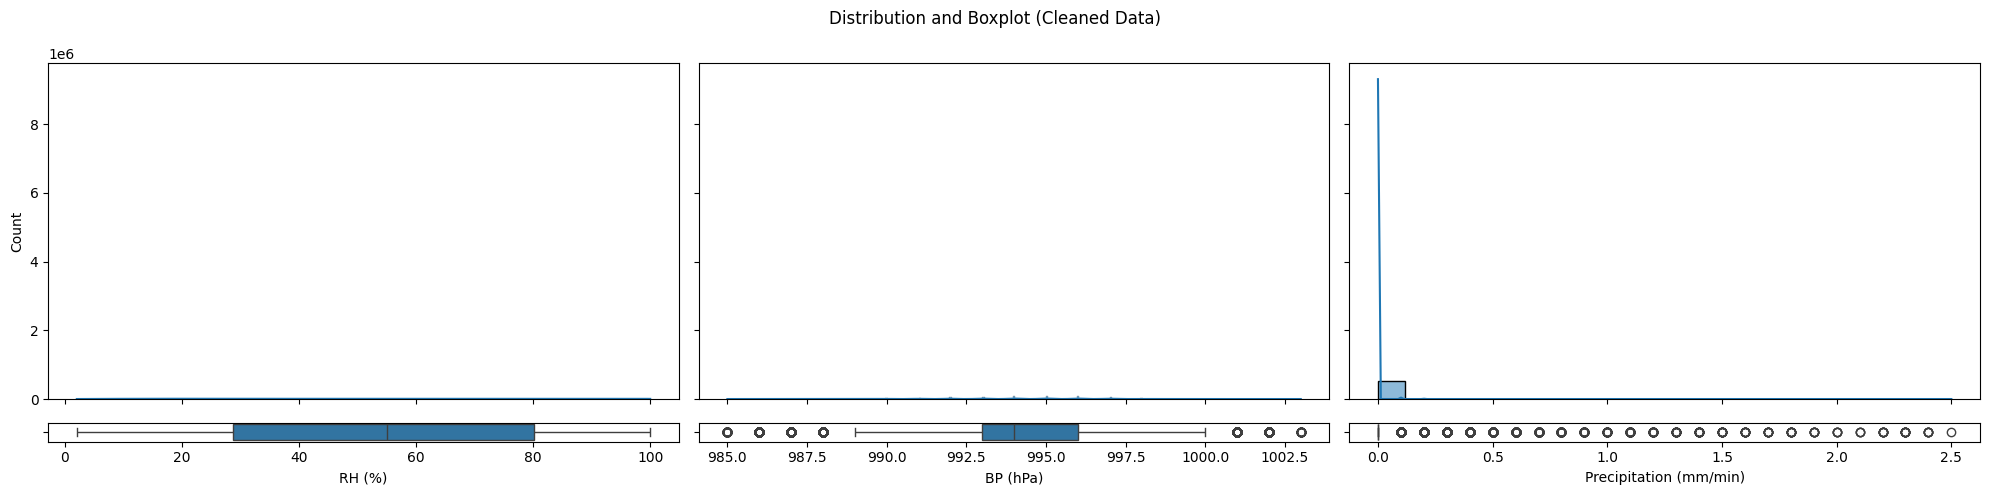

In [47]:
generate_hist_box_plots(
    df_bn,
    plot_data=[
        {"column": "RH", "label": "RH (%)"},
        {"column": "BP", "label": "BP (hPa)"},
        {"column": "Precipitation", "label": "Precipitation (mm/min)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)
generate_hist_box_plots(
    df_bn_cleaned,
    plot_data=[
        {"column": "RH", "label": "RH (%)"},
        {"column": "BP", "label": "BP (hPa)"},
        # {"column": "Cleaning", "label": "Cleaning (1 or 0)"},
        {"column": "Precipitation", "label": "Precipitation (mm/min)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

## Correlation Analysis

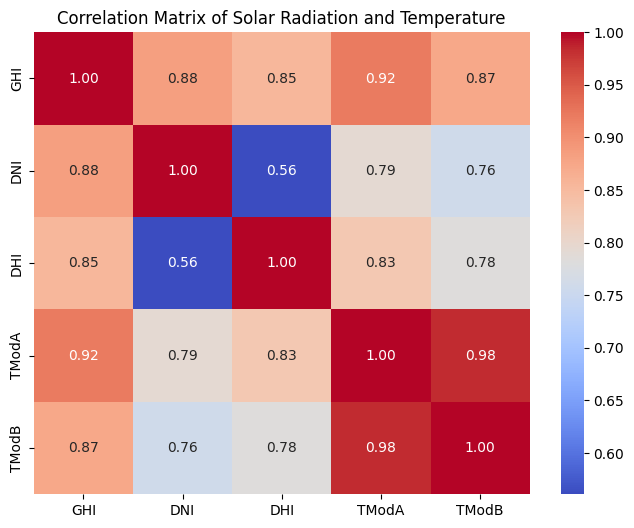

In [48]:
# Correlation matrix between solar radiation components and temperature measures
correlation_matrix = df_bn[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Solar Radiation and Temperature")
plt.show()

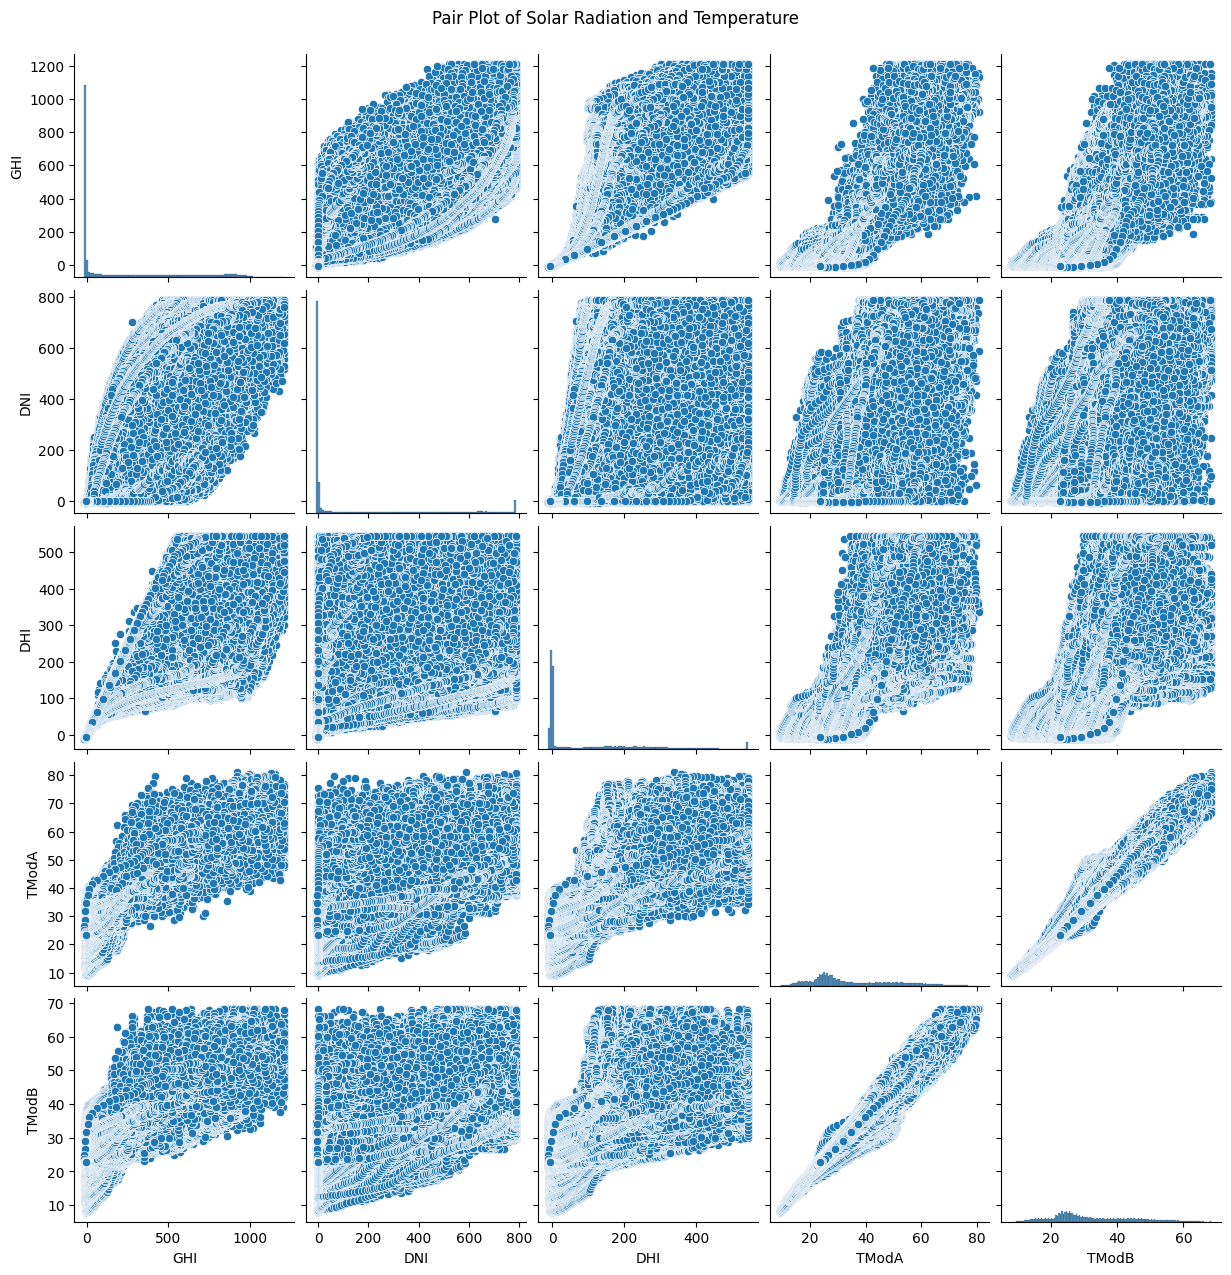

In [49]:
# Pair Plot between solar radiation components and temperature measures
sns.pairplot(df_bn[["GHI", "DNI", "DHI", "TModA", "TModB"]])
plt.suptitle("Pair Plot of Solar Radiation and Temperature", y=1.02)
plt.show()

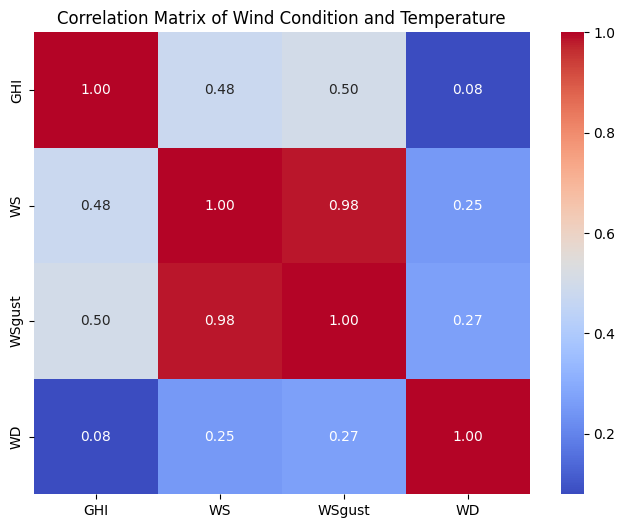

In [50]:
# Correlation matrix between wind condition components and temperature measures
correlation_matrix = df_bn[["GHI", "WS", "WSgust", "WD"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Wind Condition and Temperature")
plt.show()

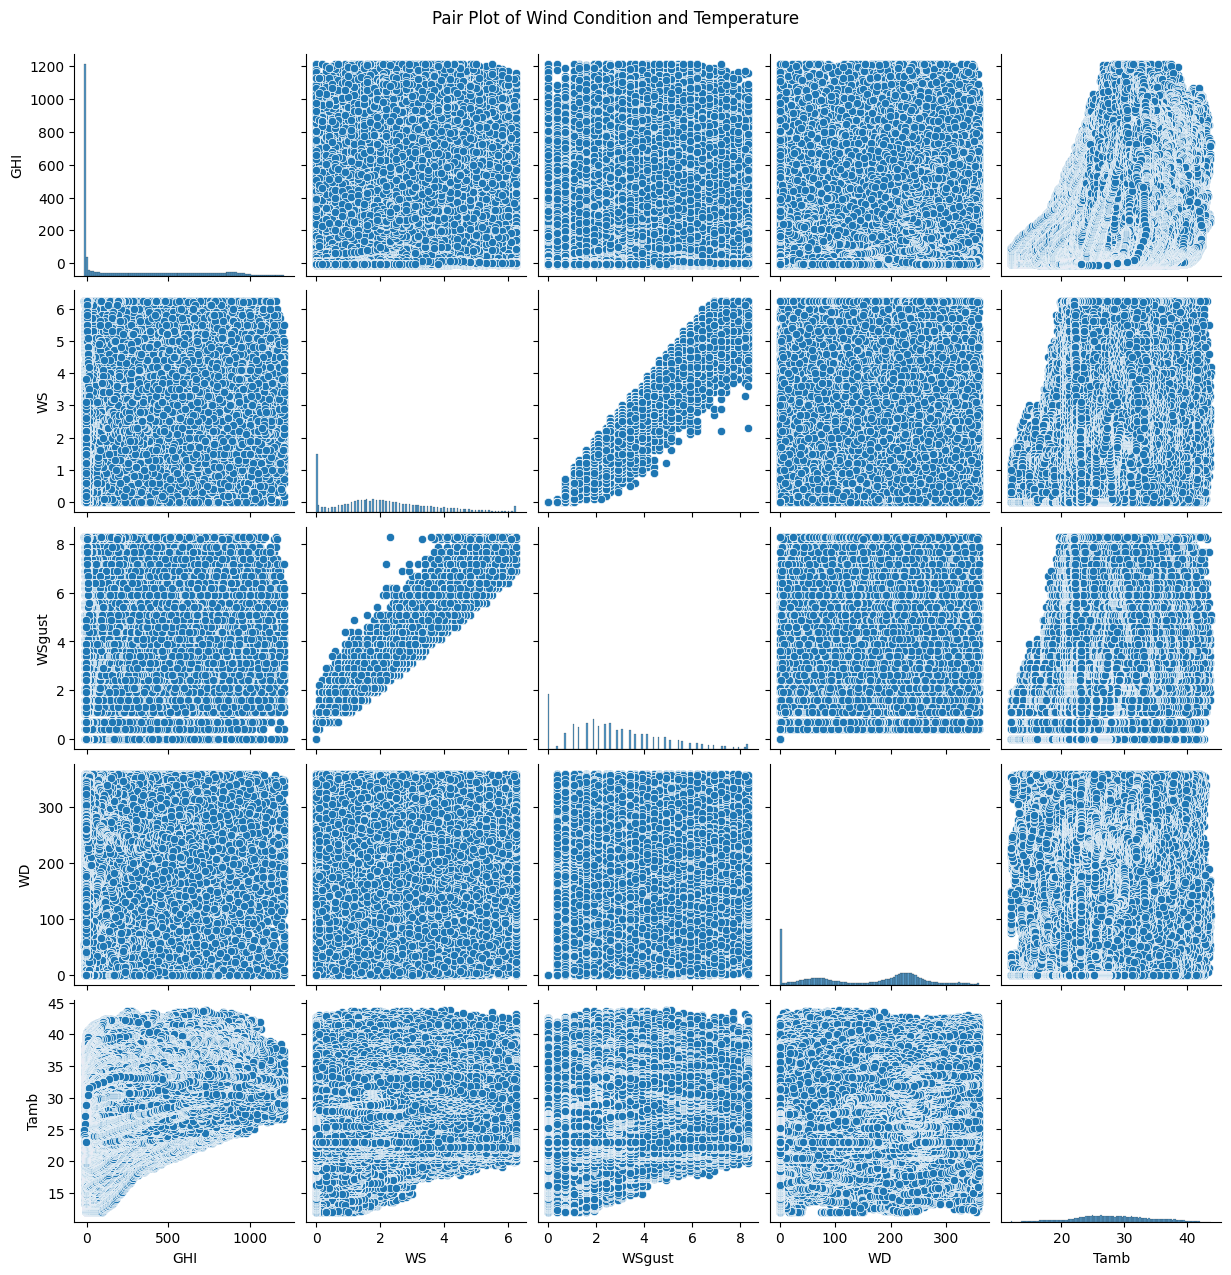

In [51]:
# Pair Plot between wind conditions components and temperature measures
sns.pairplot(df_bn[["GHI", "WS", "WSgust", "WD", "Tamb"]])
plt.suptitle("Pair Plot of Wind Condition and Temperature", y=1.02)
plt.show()

Observations:
- There are no observable correlation between tempreture and wind conditions

## Wind Analysis

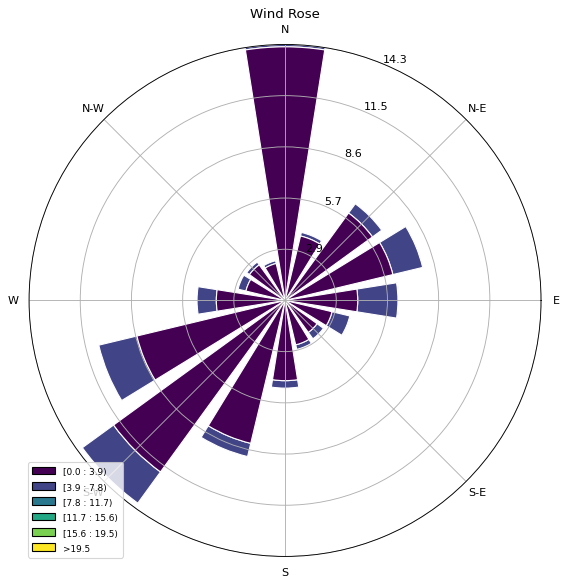

In [52]:
# Wind Analysis using wind roses
ax = WindroseAxes.from_ax()
ax.bar(df_bn_cleaned["WD"], df_bn_cleaned["WS"], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()
plt.title("Wind Rose")
plt.show()

## Temperature Analysis

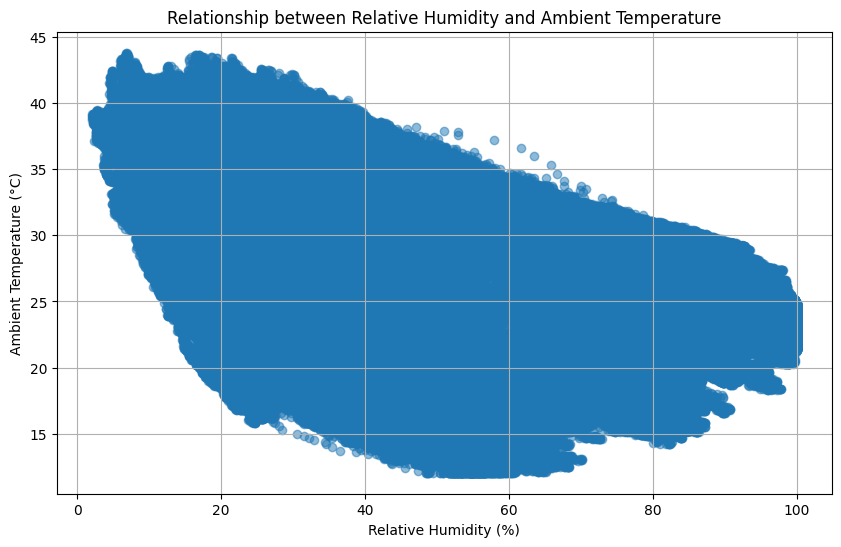

Correlation between Ambient Temperature and Relative Humidity: -0.4148765738526638


In [53]:
# scatter plot of ambient temperature vs. relative humidity
plt.figure(figsize=(10, 6))
plt.scatter(df_bn["RH"], df_bn["Tamb"], alpha=0.5)
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("Relationship between Relative Humidity and Ambient Temperature")
plt.grid(True)
plt.show()

# the pearson correlation between 'Tamb' and 'RH'
correlation = df_bn["Tamb"].corr(df_bn["RH"])
print(f"Correlation between Ambient Temperature and Relative Humidity: {correlation}")

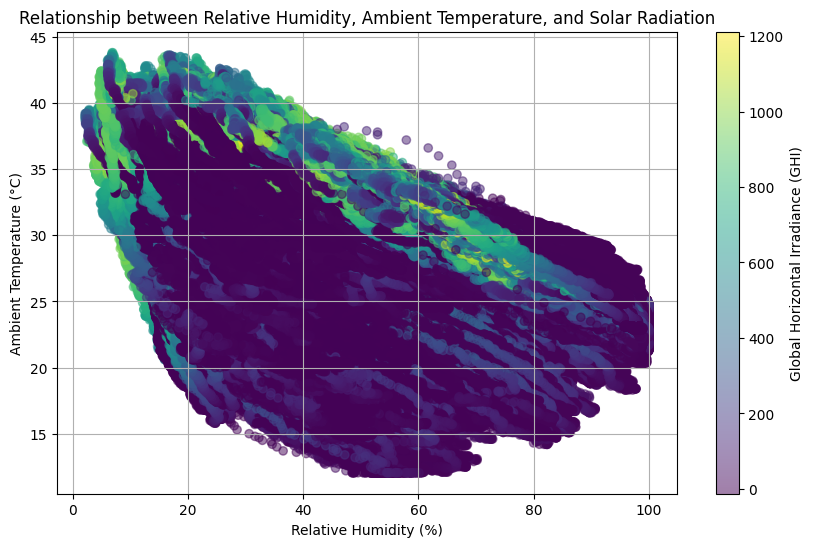

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_bn["RH"], df_bn["Tamb"], c=df_bn["GHI"], cmap="viridis", alpha=0.5
)  #'GHI' is the solar radiation data
plt.colorbar(label="Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.title(
    "Relationship between Relative Humidity, Ambient Temperature, and Solar Radiation"
)
plt.grid(True)
plt.show()

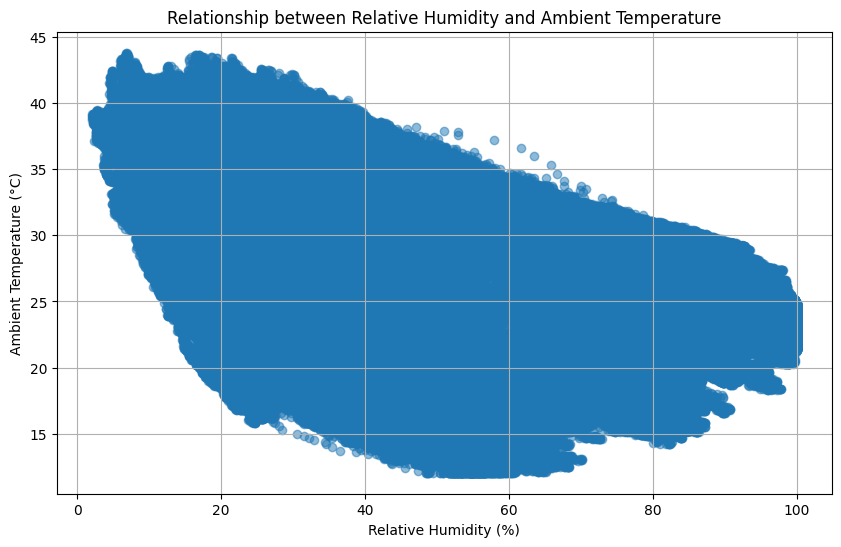

Correlation between Ambient Temperature and Relative Humidity: -0.4148765738526638


In [55]:
# Create a scatter plot of 'Tamb' (ambient temperature) vs. 'RH' (relative humidity)
plt.figure(figsize=(10, 6))
plt.scatter(
    df_bn["RH"], df_bn["Tamb"], alpha=0.5
)  # Use alpha for better visualization if many points overlap
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("Relationship between Relative Humidity and Ambient Temperature")
plt.grid(True)
plt.show()

# Calculate the correlation between 'Tamb' and 'RH'
correlation = df_bn["Tamb"].corr(df_bn["RH"])
print(f"Correlation between Ambient Temperature and Relative Humidity: {correlation}")

## Z-Score Analysis

In [56]:
# Calculate Z-scores for each numeric column
columns = [
    "GHI",
    "DNI",
    "DHI",
    "ModA",
    "ModB",
    "Tamb",
    "RH",
    "WS",
    "WSgust",
    "WD",
    "BP",
    "Cleaning",
    "Precipitation",
    "TModA",
    "TModB",
]
outlier_columns = [f"{col}_zscore" for col in columns]
df_outliers = pd.DataFrame(columns=outlier_columns, index=df_bn.index)


for col in columns:
    df_outliers[f"{col}_zscore"] = np.abs((df_bn[col] - df_bn[col].mean()) / df_bn[col].std())
df_outliers.head(2)

GHI_zscore  DNI_zscore  DHI_zscore  ModA_zscore  \
Timestamp                                                              
2021-08-09 00:01:00    0.730150    0.643014    0.739897     0.723779   
2021-08-09 00:02:00    0.729848    0.643014    0.739897     0.723779   

                     ModB_zscore  Tamb_zscore  RH_zscore  WS_zscore  \
Timestamp                                                             
2021-08-09 00:01:00     0.723162     0.334224   1.386098   1.359385   
2021-08-09 00:02:00     0.723162     0.334224   1.393222   1.359385   

                     WSgust_zscore  WD_zscore  BP_zscore  Cleaning_zscore  \
Timestamp                                                                   
2021-08-09 00:01:00       1.218619   0.306208   1.558079         0.030391   
2021-08-09 00:02:00       1.422400   1.499374   1.558079         0.030391   

                     Precipitation_zscore  TModA_zscore  TModB_zscore  
Timestamp                                                              
2021-08-09 00:01:00                   NaN      0.604165      0.507908  
2021-08-09 00:02:00                   NaN      0.604165      0.507908

In [57]:
# Threshold for flagging outliers
threshold = 2

# Identify outliers
outliers = df_outliers[
    df_outliers[[f"{col}" for col in df_outliers.columns]].any(axis=1) > threshold
]

print("Outliers based on Z-score:")
outliers

Outliers based on Z-score:


Empty DataFrame
Columns: [GHI_zscore, DNI_zscore, DHI_zscore, ModA_zscore, ModB_zscore, Tamb_zscore, RH_zscore, WS_zscore, WSgust_zscore, WD_zscore, BP_zscore, Cleaning_zscore, Precipitation_zscore, TModA_zscore, TModB_zscore]
Index: []

Observations:
- Since we already cleaned the outliers using inter-quartile range method, the z-score didn't find any outlier.

## Temperature Analysis

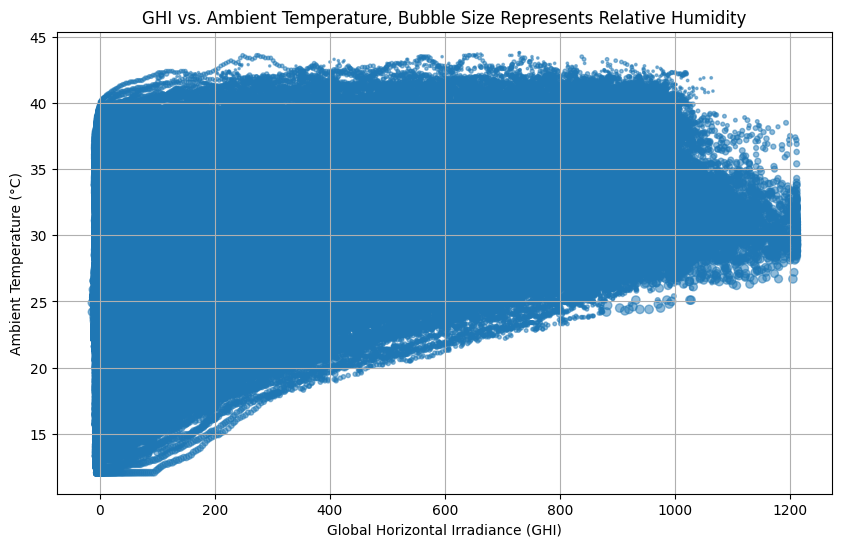

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_bn["GHI"], df_bn["Tamb"], s=df_bn["RH"] * 0.4, alpha=0.5
)  # adjust the 0.1 for size if needed
plt.xlabel("Global Horizontal Irradiance (GHI)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("GHI vs. Ambient Temperature, Bubble Size Represents Relative Humidity")
plt.grid(True)
plt.show()

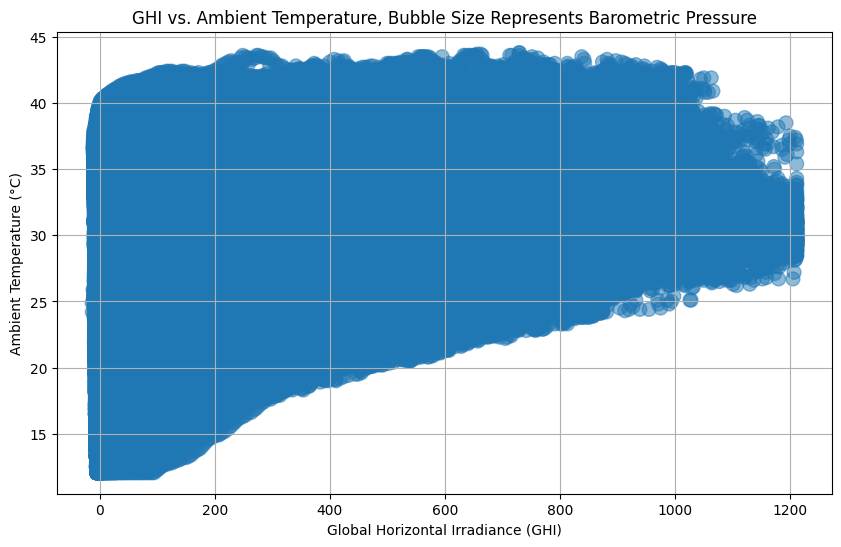

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(df_bn["GHI"], df_bn["Tamb"], s=df_bn["BP"] * 0.1, alpha=0.5)
plt.xlabel("Global Horizontal Irradiance (GHI)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("GHI vs. Ambient Temperature, Bubble Size Represents Barometric Pressure")
plt.grid(True)
plt.show()